In [6]:
import scanpy as sc
adata = sc.read_h5ad('raw_lung.h5')

In [8]:

d1 = adata.obs.groupby(['time_point', 'cell_type']).size().to_frame().reset_index()
d1['time_point'] = d1['time_point'].astype(str)
d1.loc[  d1['time_point'] == 'Control', 'time_point' ] = 0
d1.loc[  d1['time_point'] == 'day 2', 'time_point' ] = 2
d1.loc[  d1['time_point'] == 'day 3', 'time_point' ] = 3
d1.loc[  d1['time_point'] == 'day 4', 'time_point' ] = 4
d1.loc[  d1['time_point'] == 'day 5', 'time_point' ] = 5
d1.loc[  d1['time_point'] == 'day 6', 'time_point' ] = 6
d1.loc[  d1['time_point'] == 'day 7', 'time_point' ] = 7
d1.loc[  d1['time_point'] == 'day 8', 'time_point' ] = 8
d1.loc[  d1['time_point'] == 'day 9', 'time_point' ] = 9
d1.loc[  d1['time_point'] == 'day 10', 'time_point' ] = 10
d1.loc[  d1['time_point'] == 'day 11', 'time_point' ] = 11
d1.loc[  d1['time_point'] == 'day 12', 'time_point' ] = 12
d1.loc[  d1['time_point'] == 'day 13', 'time_point' ] = 13
d1.loc[  d1['time_point'] == 'day 15', 'time_point' ] = 15
d1.loc[  d1['time_point'] == 'day 21', 'time_point' ] = 21
d1.loc[  d1['time_point'] == 'day 28', 'time_point' ] = 28
d1.loc[  d1['time_point'] == 'day 36', 'time_point' ] = 36
d1.loc[  d1['time_point'] == 'day 54', 'time_point' ] = 54

d1 = d1.rename(columns = {0 : 'values'})

#d1 = d1[~d1['cell_type'].isin(['AT2', 'MHC-II+ Club'])]

d1 = d1[d1['time_point'] < 15]

df_pivot = d1.pivot(index='time_point', columns='cell_type', values='values')

#df_pivot = df_pivot.div(df_pivot.sum(axis = 1), axis = 0)

print(df_pivot.shape)

df_pivot


(13, 14)


C:\Users\Lufesu\AppData\Local\Temp\ipykernel_178880\4133772607.py:28: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pivot = d1.pivot(index='time_point', columns='cell_type', values='values')


cell_type   AT1   AT2  AT2 activated  Basal  Ciliated  Ciliated activated  \
time_point                                                                  
0            20  1736              3      5       242                  18   
2             2   453            504      4        47                 563   
3            23   367           1068      8        33                 419   
4             3   197           1352      4        29                 319   
5            23   213           1013      7        26                 386   
6            11   112            294      1         7                 132   
7            30   189            417      5        15                 229   
8            50   135            273      7        38                 195   
9            46   125            161     12        46                 322   
10           80   433            141      8       226                 188   
11           82   234             61     23       387                 208   
12          102   516             95      9       280                 154   
13          168   356            104     15       340                 110   

cell_type   Club  Club activated  Club to ciliated  Goblet  Krt8+ ADI  \
time_point                                                              
0            134              12                43      46          3   
2             75             215                59      82         80   
3             28             153                38      57        143   
4             23             259                23      93        217   
5             23             244                37      87        219   
6             16              85                16      37         78   
7             17             149                24      53        188   
8             39             106                11      40        192   
9             53             261                46     119        233   
10           195             251               101     182        158   
11           258              31                53      87        191   
12           182              32                17      94        196   
13           286              26                39      99        194   

cell_type   MHC-II+ Club  Mki67+ Proliferation  Neuroendocrine  
time_point                                                      
0                     87                    24               3  
2                     58                     1               2  
3                    104                    20               4  
4                     72                    22               2  
5                     90                    34               2  
6                     50                    40               3  
7                    120                    63               3  
8                     45                    56               6  
9                     78                    39               4  
10                   218                    57               5  
11                    97                    59               6  
12                   112                    69               6  
13                   108                   192               9

# Plot showing number of cells

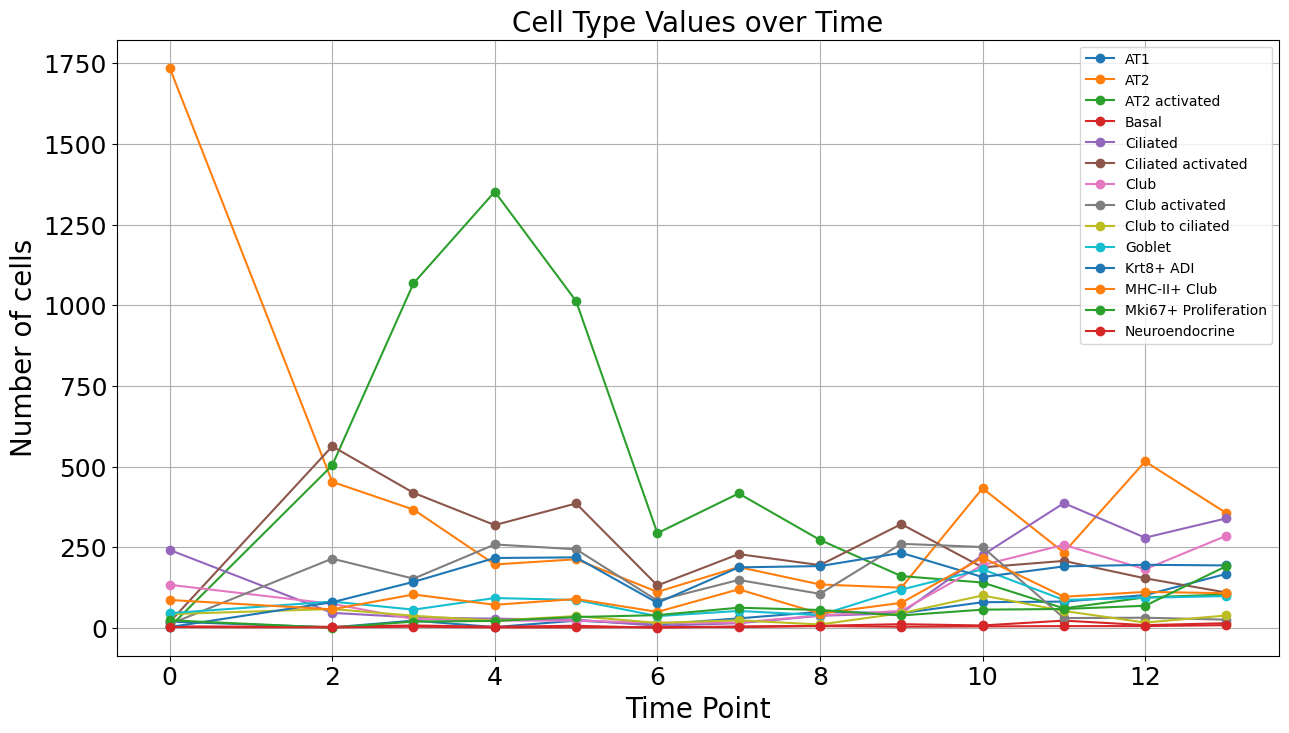

In [3]:
import matplotlib.pyplot as plt
# Plotting

plt.figure(figsize=(15, 8))
for cell_type in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[cell_type], marker='o', label=cell_type)
plt.xlabel('Time Point', fontsize=20)
plt.ylabel('Number of cells', fontsize=20)
plt.title('Cell Type Values over Time', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.grid(True)
plt.show()    

# Plot showing proportion of cells

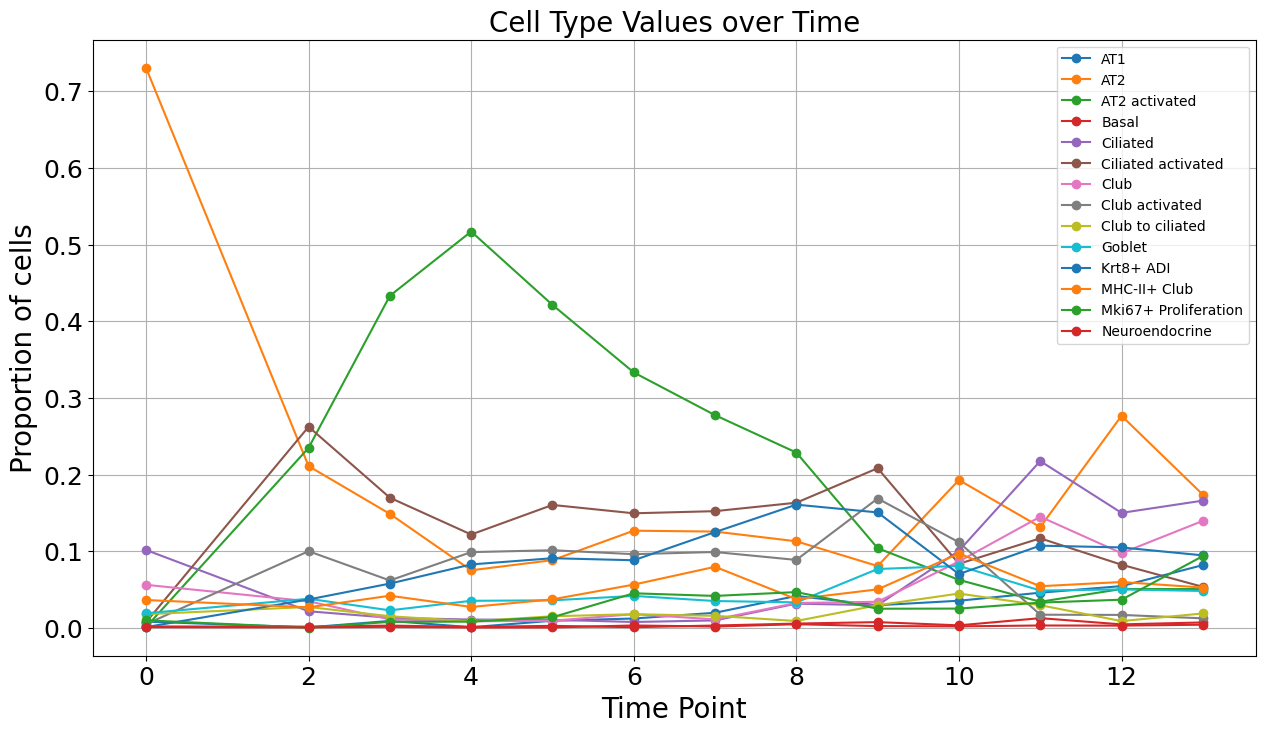

In [4]:
# Plotting
plt.figure(figsize=(15, 8))
for cell_type in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[cell_type]/df_pivot.sum(axis = 1), marker='o', label=cell_type)
plt.xlabel('Time Point', fontsize=20)
plt.ylabel('Proportion of cells', fontsize=20)
plt.title('Cell Type Values over Time', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.grid(True)
plt.show()   

In [9]:
import numpy as np
import pyro
import pyro.distributions as dist
import torch
import tqdm
from pyro.distributions.constraints import positive
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

import pandas as pd
import numpy as np
import cvxpy 
import scipy
import cvxopt 
from cvxopt import matrix, solvers
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
data_matrix = df_pivot.to_numpy()

# Convert the data to a PyTorch tensor
data = torch.tensor(data_matrix, dtype=torch.float32)

y_ik = torch.tensor(data)  # Replace with your data
n_i = data.sum(axis = 1) # Replace with your data

C:\Users\Lufesu\AppData\Local\Temp\ipykernel_178880\405228992.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_ik = torch.tensor(data)  # Replace with your data


# Model I

In [31]:
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
import torch

# Assuming y_ik (cell counts) and n_i (total cells) are provided as PyTorch tensors
# y_ik = torch.tensor([...])  # shape [13, 12]
# n_i = torch.tensor([...])  # shape [13]

def model(y_ik, n_i):
    num_time_points, num_cell_types = y_ik.shape

    time_plate = pyro.plate("time", num_time_points, dim=-2)
    cell_type_plate = pyro.plate("cell_type", num_cell_types, dim=-1)

    with time_plate, cell_type_plate:
        # Corrected prior for mu_ik
        mu_ik = pyro.sample("mu_ik", dist.Normal(torch.ones((num_time_points, num_cell_types)), 
                                                 torch.ones((num_time_points, num_cell_types))))

        # Poisson likelihood
        rate = n_i.unsqueeze(-1).expand(-1, num_cell_types) * torch.exp(mu_ik)
        pyro.sample("obs", dist.Poisson(rate), obs=y_ik)

def guide(y_ik, n_i):
    num_time_points, num_cell_types = y_ik.shape

    # Corrected learnable parameters for mu_ik
    mu_loc = pyro.param("mu_loc", torch.ones((num_time_points, num_cell_types)))
    mu_scale = pyro.param("mu_scale", torch.ones((num_time_points, num_cell_types)), constraint=dist.constraints.positive)

    time_plate = pyro.plate("time", num_time_points, dim=-2)
    cell_type_plate = pyro.plate("cell_type", num_cell_types, dim=-1)

    with time_plate, cell_type_plate:
        pyro.sample("mu_ik", dist.Normal(mu_loc, mu_scale))

# SVI
pyro.clear_param_store()
optimizer = Adam({"lr": 0.01})
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())
losses = []
num_steps = 10000  # Adjust the number of steps as needed
for step in range(num_steps):
    loss = svi.step(y_ik, n_i)
    losses.append(loss)
    if step % 500 == 0:
        print(f"Step {step}, loss: {loss}")

# Retrieve learned parameters
mu_ik_estimated = pyro.param("mu_loc").detach()

Step 0, loss: 1554847.5
Step 500, loss: 116279.62631225586
Step 1000, loss: 35577.37985229492
Step 1500, loss: 16157.901649475098
Step 2000, loss: 10139.543701171875
Step 2500, loss: 6508.20263671875
Step 3000, loss: 5191.9244384765625
Step 3500, loss: 4050.628574371338
Step 4000, loss: 3814.505302429199
Step 4500, loss: 3641.0640754699707
Step 5000, loss: 3273.2858695983887
Step 5500, loss: 3121.6914110183716
Step 6000, loss: 3063.9258728027344
Step 6500, loss: 2996.804641723633
Step 7000, loss: 2923.3326263427734
Step 7500, loss: 2929.1628341674805
Step 8000, loss: 2884.443374633789
Step 8500, loss: 2874.0904235839844
Step 9000, loss: 2861.921516418457
Step 9500, loss: 2845.171012878418


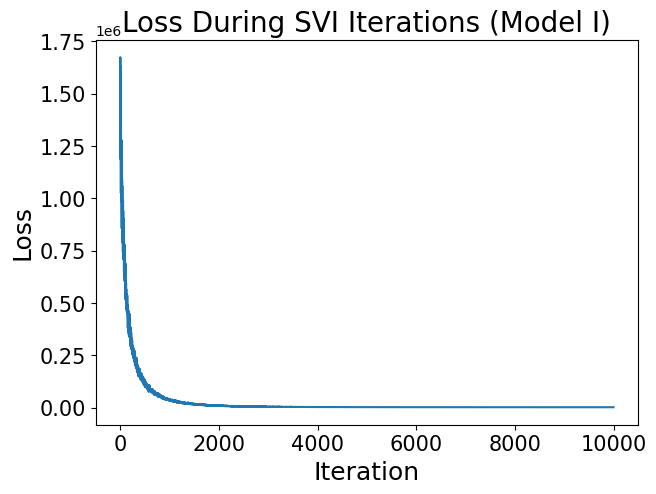

In [32]:
# Plotting the loss
plt.figure(figsize=(7, 5))
plt.plot(losses)
plt.title("Loss During SVI Iterations (Model I)", fontsize = 20)
plt.xlabel("Iteration", fontsize = 18)
plt.ylabel("Loss", fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

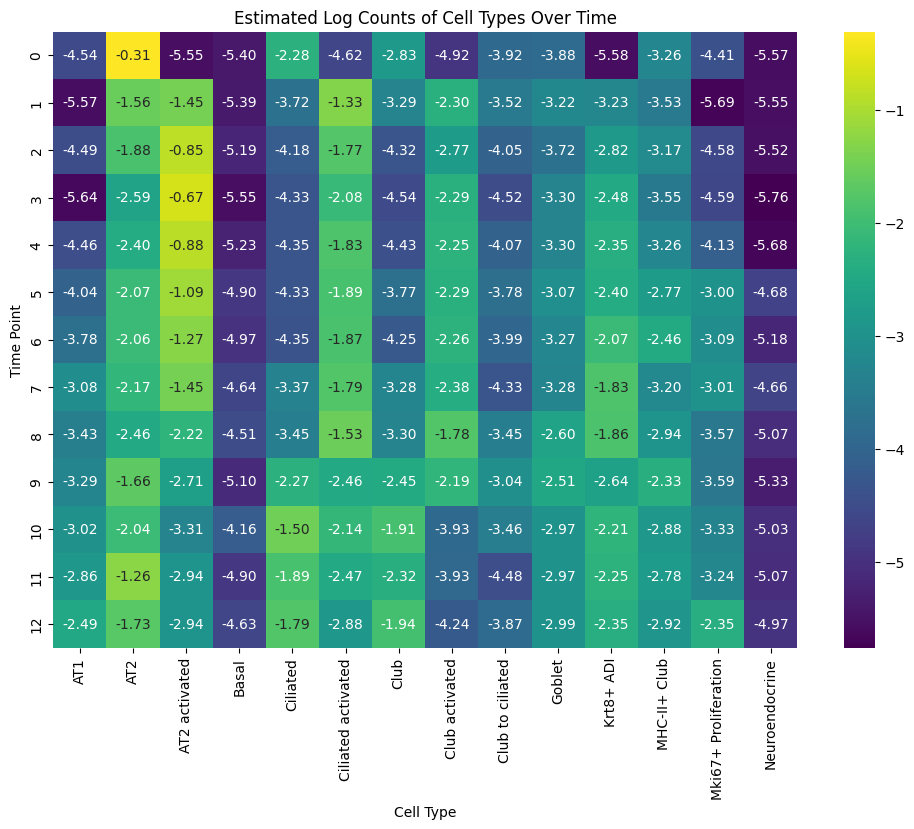

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming mu_ik_estimated is a PyTorch tensor, convert it to a NumPy array for plotting
mu_ik_estimated_np = mu_ik_estimated.numpy()

x_labels = list(df_pivot.columns) # Replace with your labels

# Create a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(mu_ik_estimated_np, annot=True, cmap='viridis', fmt=".2f")
ax.set_xticklabels(x_labels, rotation = 90)  # rotation is optional for better label readability

plt.title("Estimated Log Counts of Cell Types Over Time")
plt.xlabel("Cell Type")
plt.ylabel("Time Point")
plt.show()

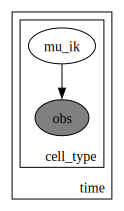

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

pyro.render_model(model, model_args=(data, n_i), render_params = True)


## Trend Filtering D1

In [35]:
import pandas as pd
import numpy as np
import cvxpy 
import scipy
import cvxopt 
from cvxopt import matrix, solvers
import pandas_datareader.data as web 
import matplotlib.pyplot as plt

In [36]:
import cvxpy as cp
import numpy as np

log_counts = np.array(mu_ik_estimated_np)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape

# Define a range of lambda values to test
lambda_values = np.linspace(0.1, 1, 100)  # Adjust as needed

# Placeholder to store the best lambda for each cell type
best_lambdas_d1 = np.zeros(num_cell_types)

# Perform LOOCV for each cell type
for cell_type in range(num_cell_types):
    best_performance = float('inf')
    best_lambda = 0

    for lambda_value in lambda_values:
        errors = np.zeros(num_time_points)

        for i in range(num_time_points):
            # Leave one out
            train_data = np.delete(log_counts[:, cell_type], i)

            # Perform L1 trend filtering (assuming k=1)
            x = cp.Variable(num_time_points - 1)
            D1 = np.eye(num_time_points - 1, k=1) - np.eye(num_time_points - 1)
            D1 = D1[:-1, :]  # First difference matrix

            # Set up the optimization problem
            objective = cp.Minimize(0.5 * cp.sum_squares(train_data - x) +
                                    lambda_value * cp.norm(D1 @ x, 1))
            problem = cp.Problem(objective)
            problem.solve()

            # Predict the left-out point
            predicted = x.value[i-1] if i > 0 else x.value[i]
            errors[i] = (log_counts[i, cell_type] - predicted) ** 2

        # Average error for this lambda
        avg_error = np.mean(errors)

        # Update best performance and lambda
        if avg_error < best_performance:
            best_performance = avg_error
            best_lambda = lambda_value

    best_lambdas_d1[cell_type] = best_lambda
print("Best lambdas for each cell type with first differences:", best_lambdas_d1)


Best lambdas for each cell type with first differences: [0.53636364 0.13636364 1.         0.36363636 0.82727273 1.
 0.13636364 1.         0.33636364 0.19090909 0.13636364 0.37272727
 0.72727273 0.48181818]


In [37]:
## Lambda set to specific value

In [ ]:
import cvxpy as cp
import numpy as np

# Assuming 'log_counts' is your numpy array of shape (num_time_points, num_cell_types)
log_counts = np.array(mu_ik_estimated_np)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape

trend_filtered_estimates = np.zeros_like(log_counts)

# Creating the first-difference matrix
D = np.eye(num_time_points, k=1) - np.eye(num_time_points)
D = D[:-1, :]  # Remove the last row to keep only the first differences

print(D)
#for lambda_value in lambda_list:    

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    # Define the variable for the trend-filtered estimate
    x = cp.Variable(num_time_points)
    
    # Set up the optimization problem
    lambda_value = 0.5  # Your chosen lambda value for this cell type
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    
    # Solve the problem
    problem.solve()
    
    # Store the trend-filtered estimates
    trend_filtered_estimates[:, i] = x.value

num_time_points, num_cell_types = log_counts.shape

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [38]:
## Best Lambda used

[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]


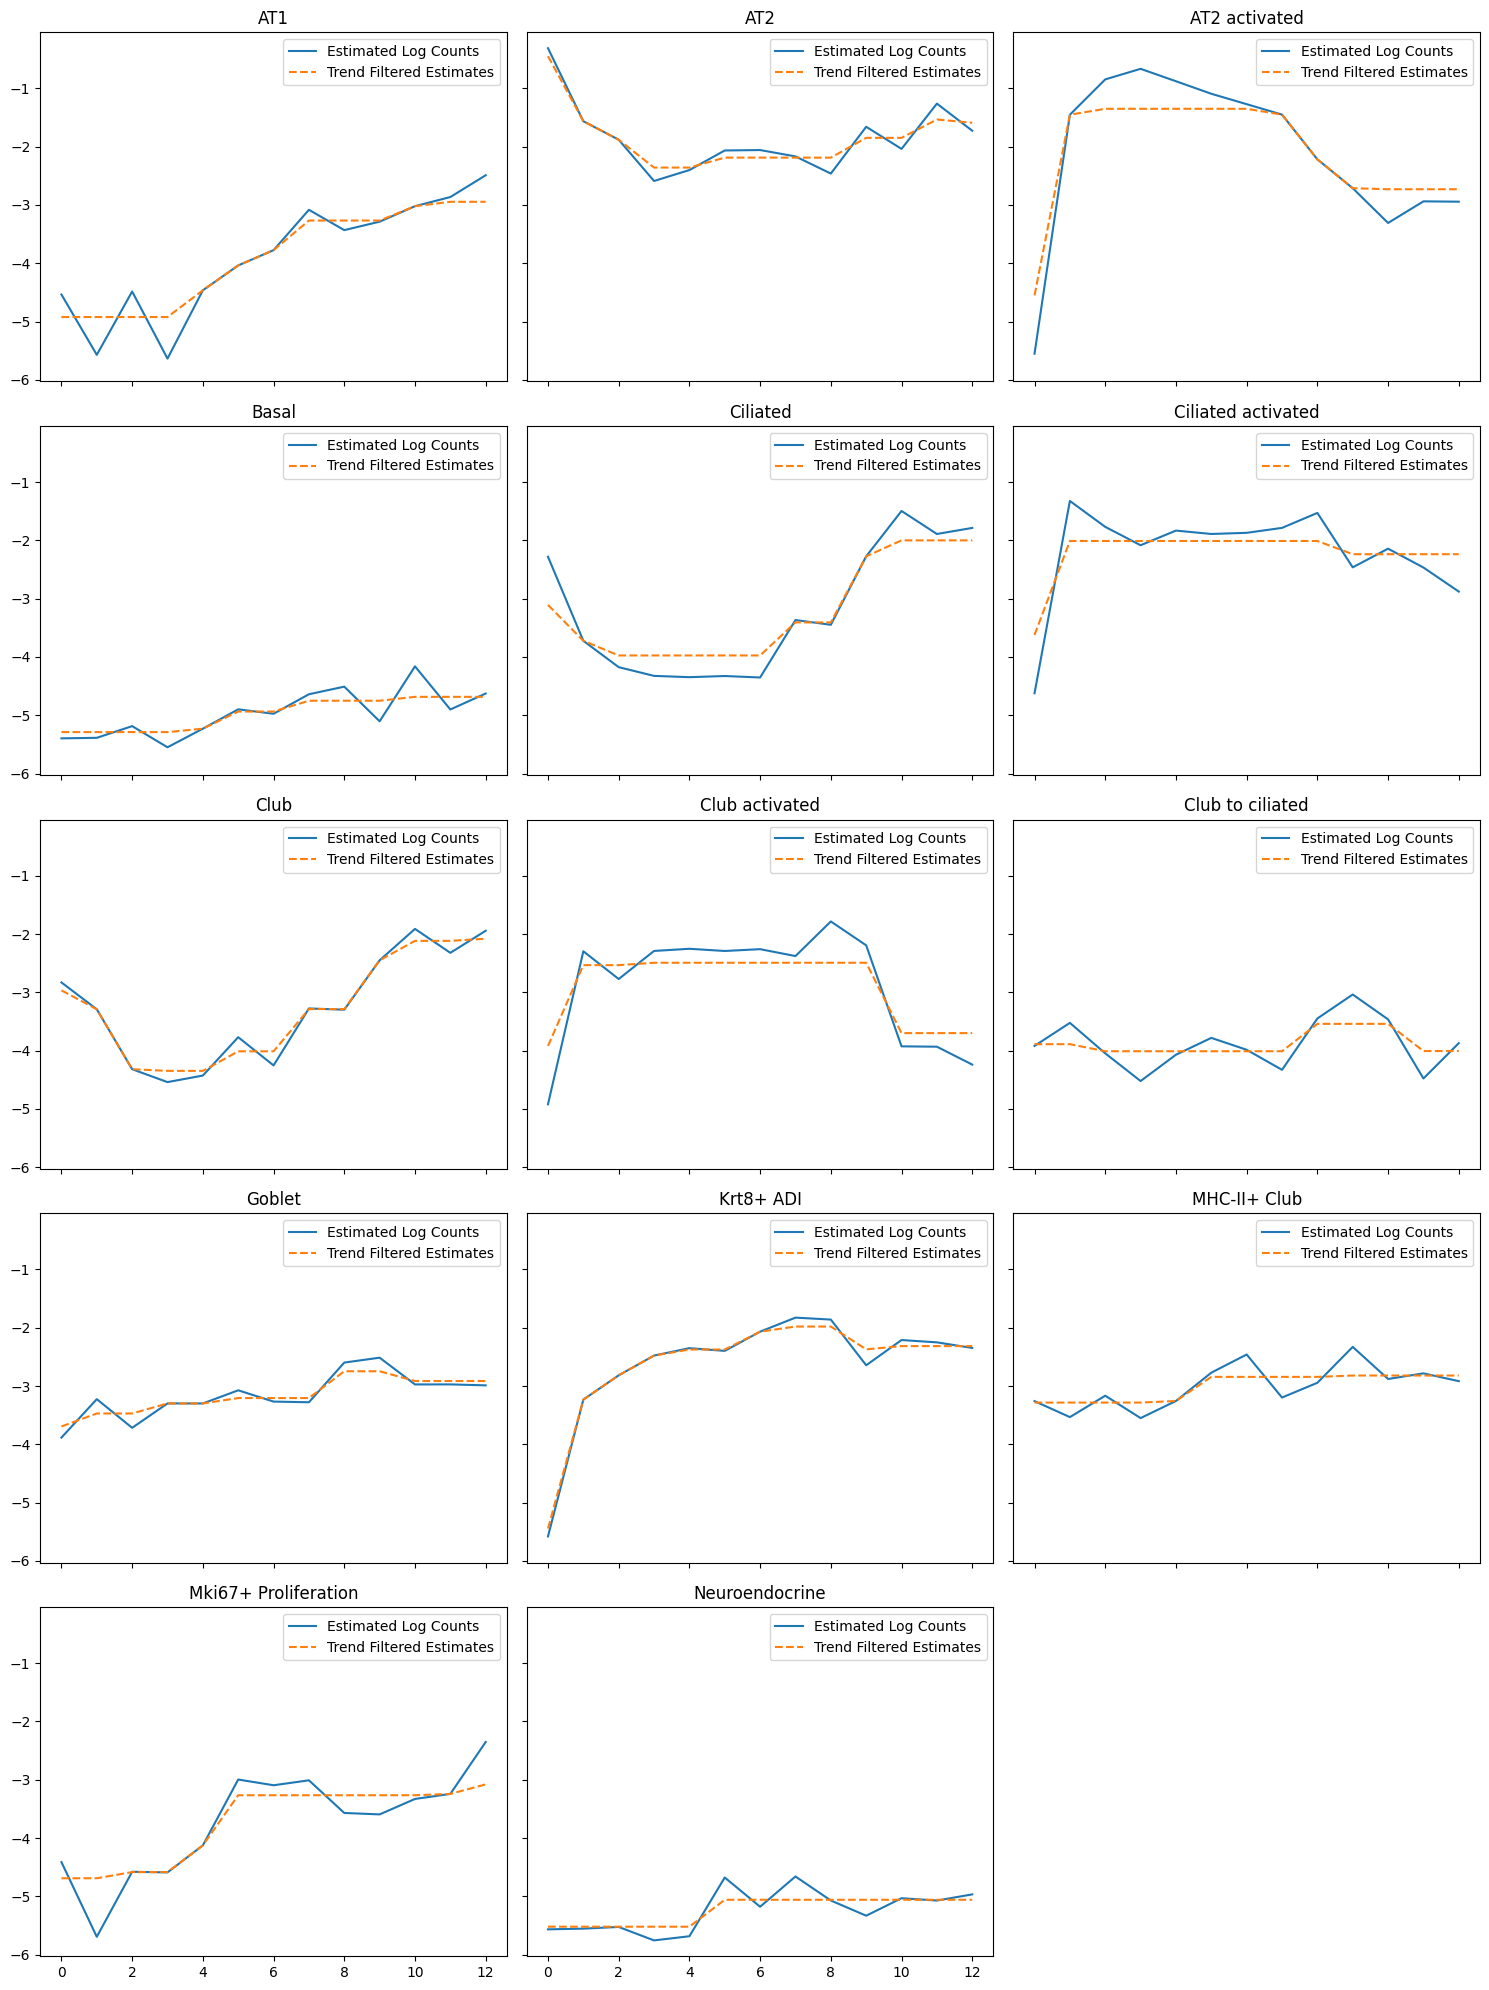

In [39]:
import cvxpy as cp
import numpy as np

# Assuming 'log_counts' is your numpy array of shape (num_time_points, num_cell_types)
log_counts = np.array(mu_ik_estimated_np)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape

trend_filtered_estimates = np.zeros_like(log_counts)

# Creating the first-difference matrix
D = np.eye(num_time_points, k=1) - np.eye(num_time_points)
D = D[:-1, :]  # Remove the last row to keep only the first differences

print(D)
#for lambda_value in lambda_list:    

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    # Define the variable for the trend-filtered estimate
    x = cp.Variable(num_time_points)
    
    # Set up the optimization problem
    lambda_value = best_lambdas_d1[i]  # Your chosen lambda value for this cell type
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    
    # Solve the problem
    problem.solve()
    
    # Store the trend-filtered estimates
    trend_filtered_estimates[:, i] = x.value

num_time_points, num_cell_types = log_counts.shape

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Trend Filtering (D2)

In [40]:
## Lambda calculation
import cvxpy as cp
import numpy as np

# Assuming 'log_counts' is your numpy array of shape (num_time_points, num_cell_types)
log_counts = np.array(mu_ik_estimated_np)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape


# Define a range of lambda values to test
lambda_values = np.linspace(0.1, 1, 100)  # Adjust as needed

# Placeholder to store the best lambda for each cell type
best_lambdas_d2 = np.zeros(num_cell_types)



# Perform LOOCV for each cell type
for cell_type in range(num_cell_types):
    best_performance = float('inf')
    best_lambda = 0

    for lambda_value in lambda_values:
        errors = np.zeros(num_time_points)

        for i in range(num_time_points):
            # Leave one out
            train_data = np.delete(log_counts[:, cell_type], i)

            # Perform L1 trend filtering (assuming k=2)
            x = cp.Variable(num_time_points - 1)
            
            # Creating the first-difference matrix
            D2 = np.eye(num_time_points - 1) - 2 * np.eye(num_time_points - 1, k=1) + np.eye(num_time_points - 1, k=2)
            D2 = D2[:-2, :]  # Second difference matrix
            # Set up the optimization problem
            objective = cp.Minimize(0.5 * cp.sum_squares(train_data - x) +
                                    lambda_value * cp.norm(D2 @ x, 1))
            problem = cp.Problem(objective)
            problem.solve()

            # Predict the left-out point
            predicted = x.value[i-1] if i > 0 else x.value[i]
            errors[i] = (log_counts[i, cell_type] - predicted) ** 2

        # Average error for this lambda
        avg_error = np.mean(errors)

        # Update best performance and lambda
        if avg_error < best_performance:
            best_performance = avg_error
            best_lambda = lambda_value

    best_lambdas_d2[cell_type] = best_lambda

print("Best lambdas for each cell type:", best_lambdas_d2)

Best lambdas for each cell type: [1.         0.33636364 1.         0.90909091 0.58181818 1.
 0.17272727 1.         0.28181818 0.32727273 0.92727273 0.47272727
 0.44545455 0.48181818]


## Lambda set to 0.2

[[ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]]


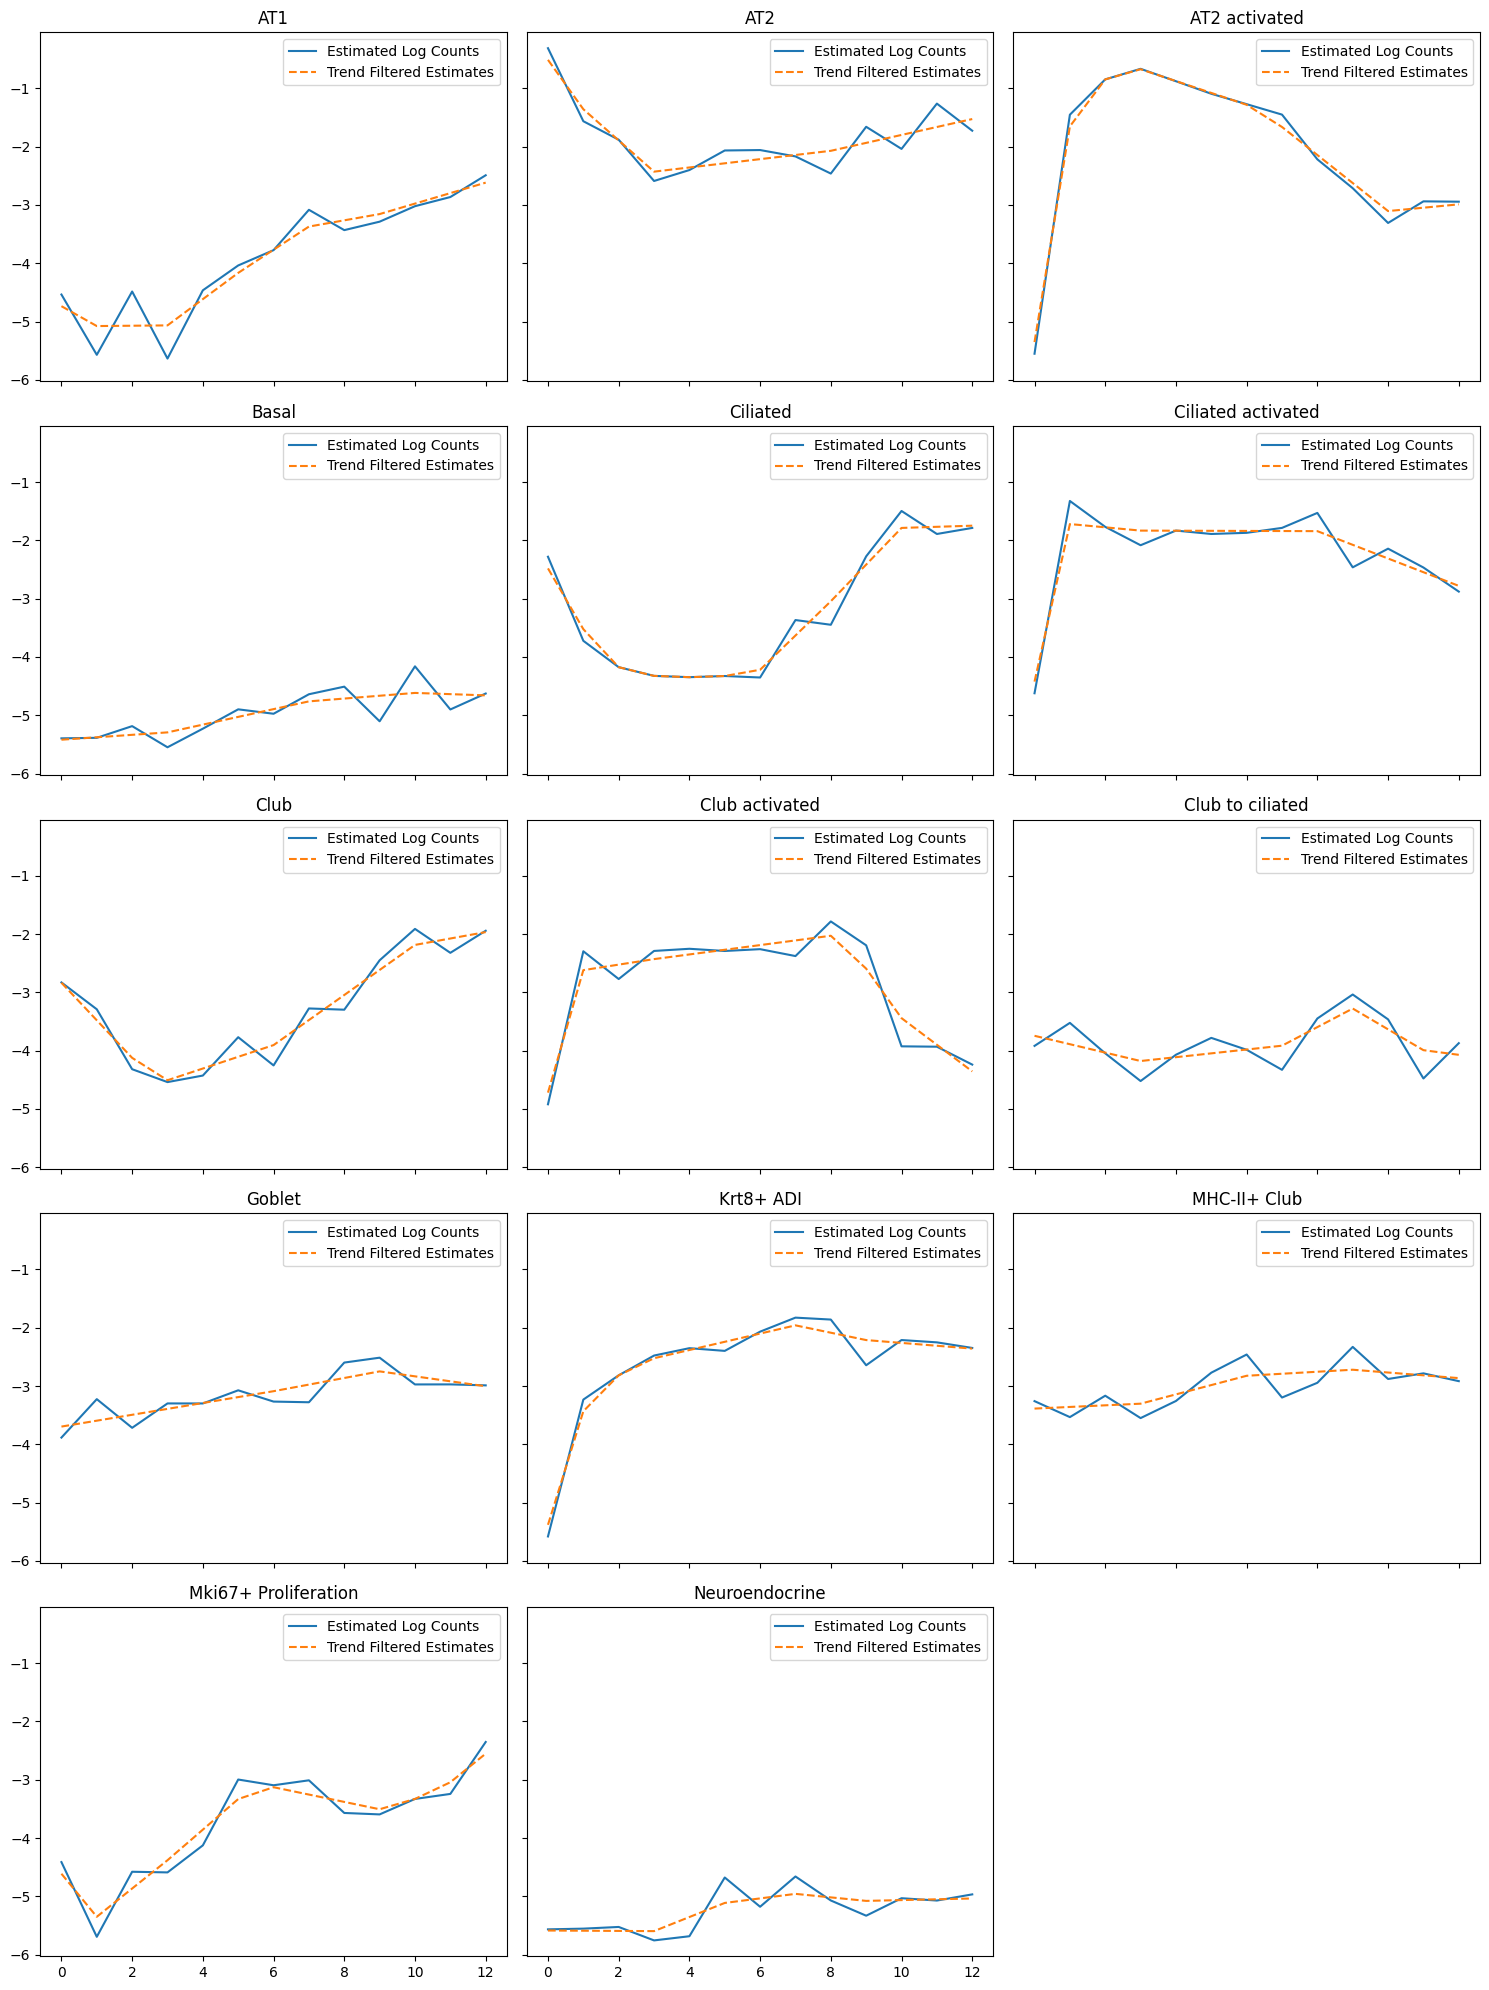

In [41]:
log_counts = np.array(mu_ik_estimated_np)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape
trend_filtered_estimates = np.zeros_like(log_counts)

D = np.eye(num_time_points) - 2 * np.eye(num_time_points, k=1) + np.eye(num_time_points, k=2)
D = D[:-2, :]  
print(D)

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    x = cp.Variable(num_time_points)
    lambda_value = 0.2  # Adjust lambda value as needed
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    trend_filtered_estimates[:, i] = x.value

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Best lambda selected

[[ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]]


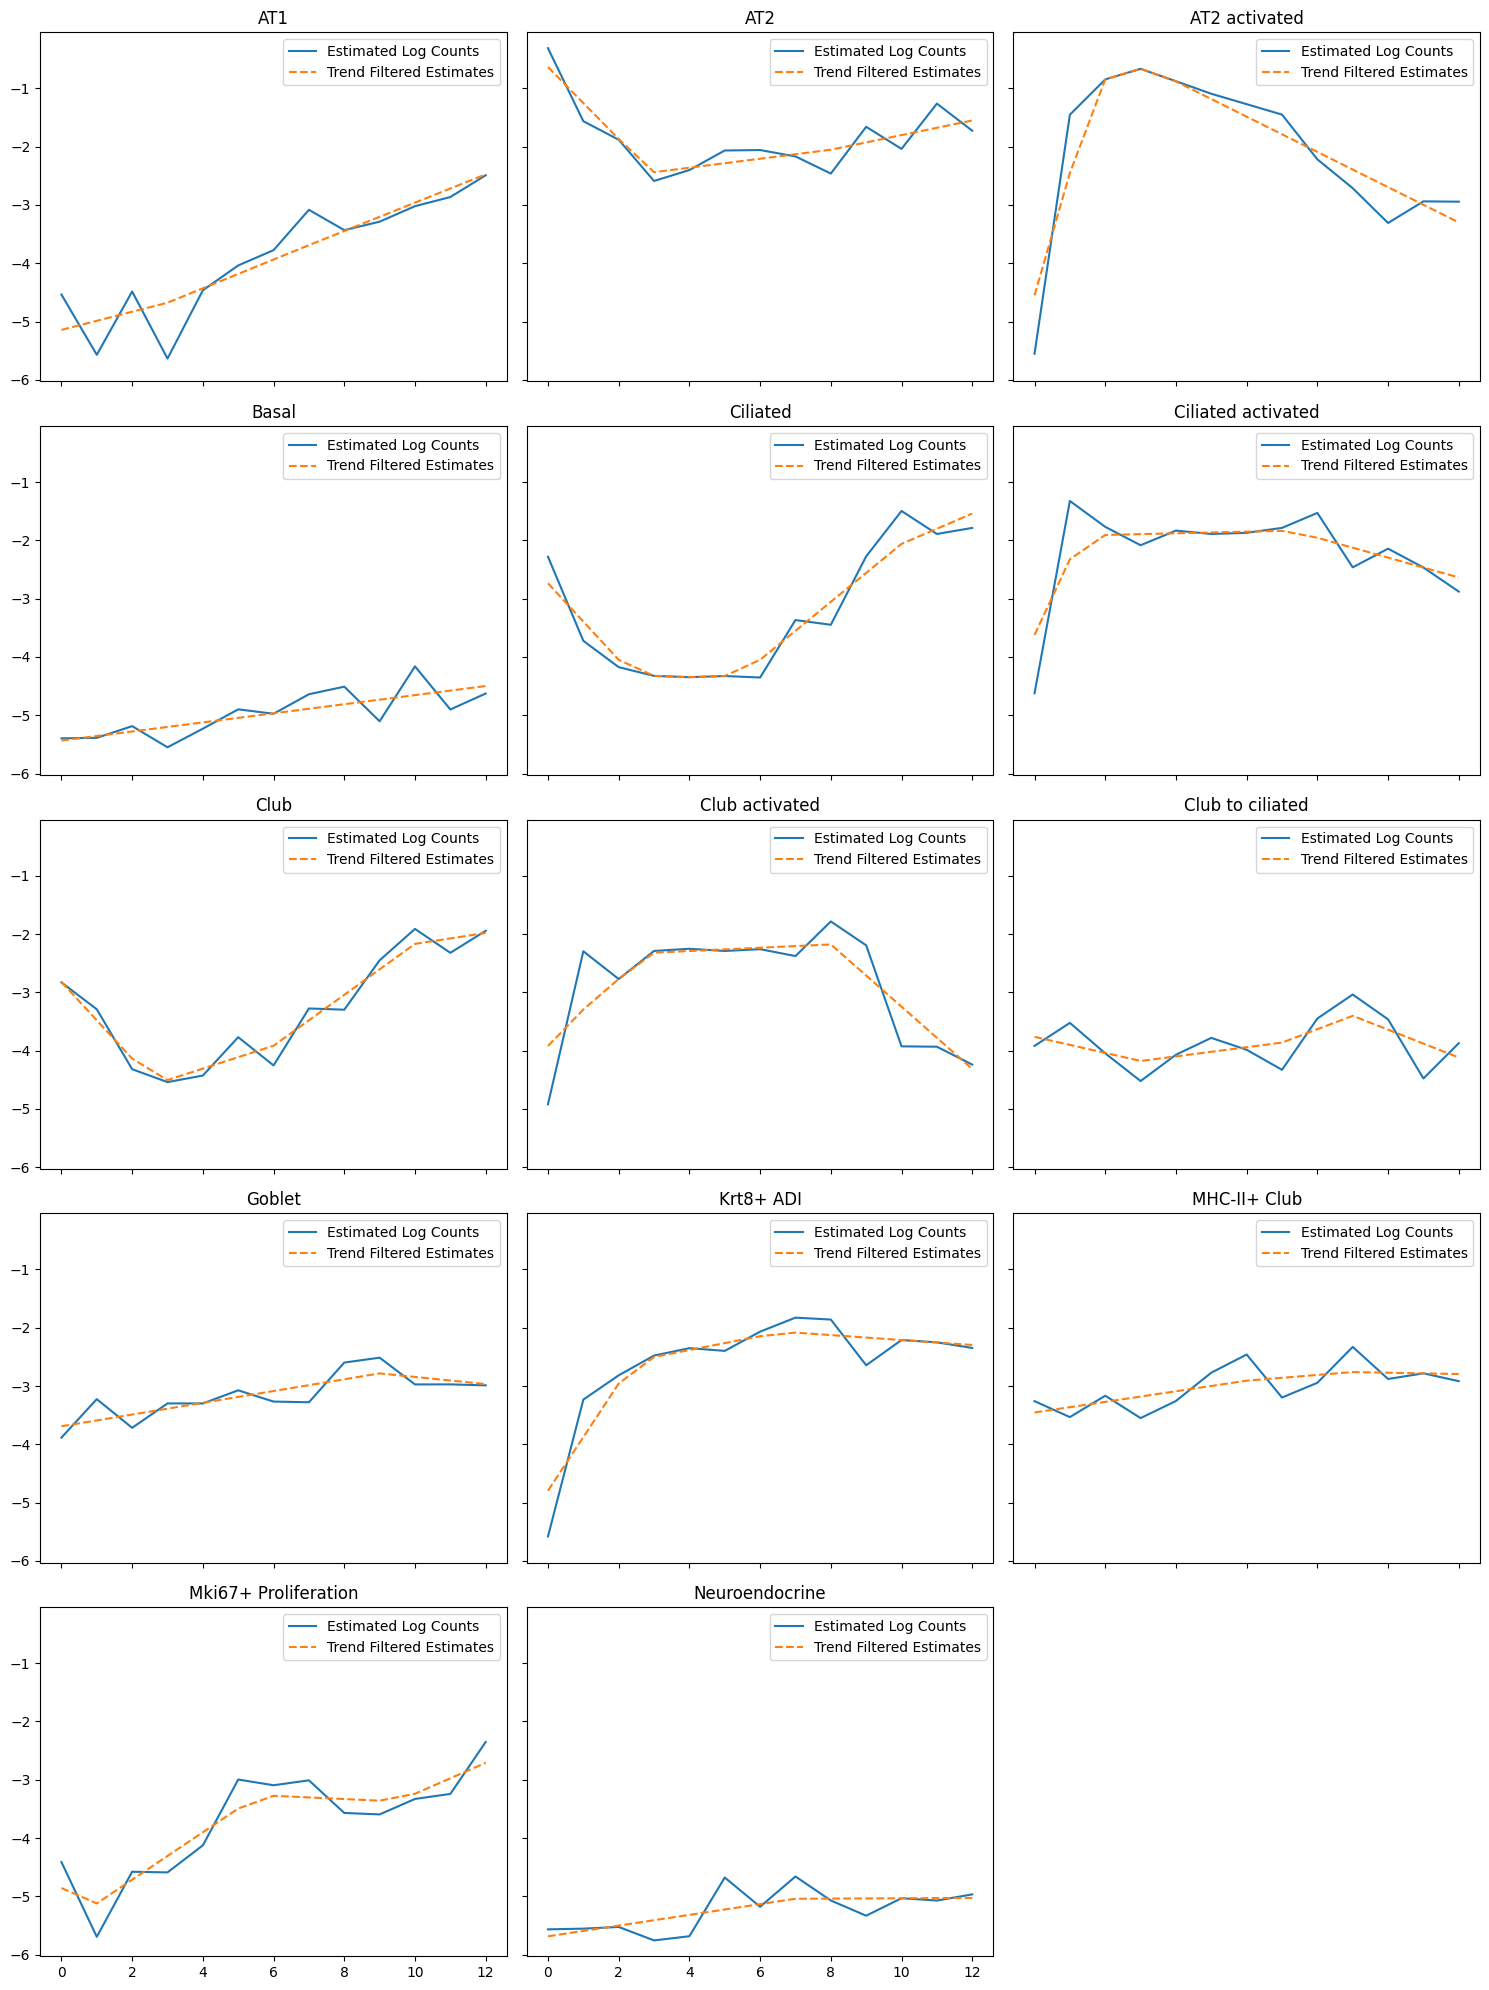

In [42]:
log_counts = np.array(mu_ik_estimated_np)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape
trend_filtered_estimates = np.zeros_like(log_counts)

D = np.eye(num_time_points) - 2 * np.eye(num_time_points, k=1) + np.eye(num_time_points, k=2)
D = D[:-2, :]  
print(D)

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    x = cp.Variable(num_time_points)
    lambda_value = best_lambdas_d2[i]  # Adjust lambda value as needed
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    trend_filtered_estimates[:, i] = x.value

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Model II

In [11]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

# Randomly generate a matrix of cell counts for 13 time points and 14 cell types
num_time_points, num_cell_types = y_ik.shape




def model(y_ik, n_i):
    num_time_points, num_cell_types = y_ik.shape
    
    time_plate = pyro.plate("time", num_time_points, dim=-2)
    cell_type_plate = pyro.plate("cell_type", num_cell_types, dim=-1)
    
    # Global tissue state beta_i0
    beta_i0 = pyro.sample("beta_i0", dist.Normal(torch.zeros(num_time_points), torch.ones(num_time_points)).to_event(1))


    with cell_type_plate:
        # Cell type-specific scaling factor gamma_k
        gamma_k = pyro.sample("gamma_k", dist.Normal(torch.zeros(num_cell_types), torch.ones(num_cell_types)))


    with time_plate, cell_type_plate:
        # Cell type-specific state beta_ik
        beta_ik = pyro.sample("beta_ik", dist.Normal(torch.zeros((num_time_points, num_cell_types)), 
                                                     torch.ones((num_time_points, num_cell_types))))

        # Calculate mu_ik for each time point and each cell type
        mu_ik = gamma_k.unsqueeze(0) * beta_i0.unsqueeze(-1) + beta_ik
        #mu_ik = gamma_k.unsqueeze(0).expand(num_time_points, -1) * beta_i0.unsqueeze(-1).expand(-1, num_cell_types) + beta_ik
        mu_ik_clamped = mu_ik.clamp(min=-10, max=10)  # Prevent extreme values

        # Poisson likelihood
        rate = n_i.unsqueeze(-1).expand(-1, num_cell_types) * torch.exp(mu_ik_clamped)
    
        pyro.sample("obs", dist.Poisson(rate), obs = y_ik)

def guide(y_ik, n_i):
    num_time_points, num_cell_types = y_ik.shape

    time_plate = pyro.plate("time", num_time_points, dim=-2)
    cell_type_plate = pyro.plate("cell_type", num_cell_types, dim=-1)
    
    # Variational parameters for global tissue state (beta_i0)
    beta_i0_loc = pyro.param("beta_i0_loc", torch.zeros(num_time_points))
    beta_i0_scale = pyro.param("beta_i0_scale", torch.ones(num_time_points), constraint=dist.constraints.positive)
    pyro.sample("beta_i0", dist.Normal(beta_i0_loc, beta_i0_scale).to_event(1))

    with cell_type_plate:
        # Variational parameters for cell type-specific scaling factor (gamma_k)
        gamma_k_loc = pyro.param("gamma_k_loc", torch.zeros(num_cell_types))
        gamma_k_scale = pyro.param("gamma_k_scale", torch.ones(num_cell_types), constraint=dist.constraints.positive)
        pyro.sample("gamma_k", dist.Normal(gamma_k_loc, gamma_k_scale))
    

    with time_plate, cell_type_plate:
        beta_ik_loc = pyro.param("beta_ik_loc", torch.zeros((num_time_points, num_cell_types)))
        beta_ik_scale = pyro.param("beta_ik_scale", torch.ones((num_time_points, num_cell_types)), constraint=dist.constraints.positive)
        pyro.sample("beta_ik", dist.Normal(beta_ik_loc, beta_ik_scale))


#SVI setup
pyro.clear_param_store()
optimizer = Adam({"lr": 0.01})
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())
losses = []
num_steps = 10000  # Number of optimization steps

# Training loop
for step in range(num_steps):
    loss = svi.step(y_ik, n_i)
    losses.append(loss)
    if step % 500 == 0:
        print(f"Step {step}, loss: {loss}")

# Retrieve the learned parameters
beta_i0_estimated = pyro.param("beta_i0_loc").detach()
gamma_k_estimated = pyro.param("gamma_k_loc").detach()
beta_ik_estimated = pyro.param("beta_ik_loc").detach()

# Print the estimated parameters (optional)
print("Estimated global tissue state (beta_i0):", beta_i0_estimated)
print("Estimated cell type-specific scaling factors (gamma_k):", gamma_k_estimated)
print("Estimated cell type-specific states (beta_ik):", beta_ik_estimated)

Step 0, loss: 1123680.375
Step 500, loss: 60390.08931350708
Step 1000, loss: 20852.685242176056
Step 1500, loss: 14209.144795417786
Step 2000, loss: 9924.549356460571
Step 2500, loss: 6097.596467018127
Step 3000, loss: 4684.685889720917
Step 3500, loss: 4592.454682350159
Step 4000, loss: 3146.4452447891235
Step 4500, loss: 2724.588943004608
Step 5000, loss: 3367.475678920746
Step 5500, loss: 2558.6499943733215
Step 6000, loss: 2512.640589237213
Step 6500, loss: 2509.9493675231934
Step 7000, loss: 2263.621701002121
Step 7500, loss: 2337.473992228508
Step 8000, loss: 2262.379748106003
Step 8500, loss: 2426.5281686782837
Step 9000, loss: 2217.3467648625374
Step 9500, loss: 2232.071641921997
Estimated global tissue state (beta_i0): tensor([ 0.0240,  0.0276,  0.0217,  0.0161,  0.0254,  0.0363, -0.0018,  0.0206,
         0.0282,  0.0347,  0.0078,  0.0169,  0.0220])
Estimated cell type-specific scaling factors (gamma_k): tensor([-0.0305, -0.0222, -0.0058, -0.1003, -0.0022,  0.0453, -0.0098, -

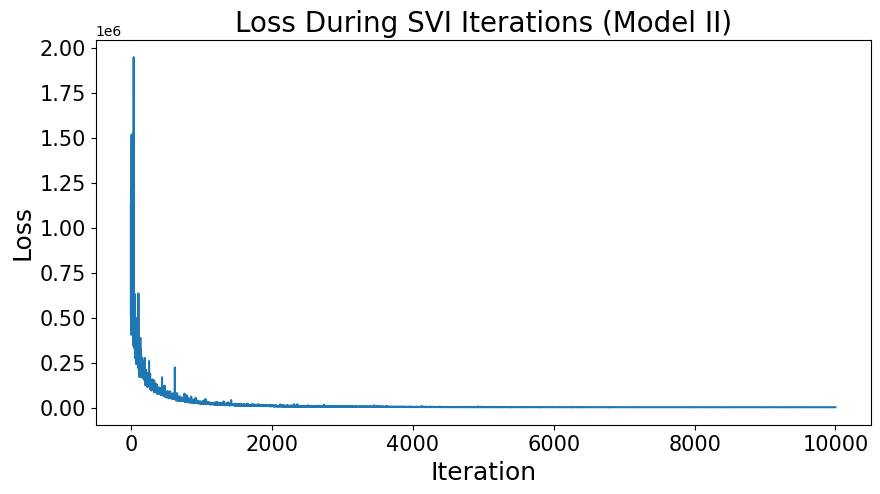

In [12]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title("Loss During SVI Iterations (Model II)", fontsize = 20)
plt.xlabel("Iteration", fontsize = 18)
plt.ylabel("Loss", fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Estimated global tissue state (beta_i0): tensor([ 0.0240,  0.0276,  0.0217,  0.0161,  0.0254,  0.0363, -0.0018,  0.0206,
         0.0282,  0.0347,  0.0078,  0.0169,  0.0220])
Estimated cell type-specific scaling factors (gamma_k): tensor([-0.0305, -0.0222, -0.0058, -0.1003, -0.0022,  0.0453, -0.0098, -0.0159,
        -0.0543, -0.0385, -0.0148, -0.0409, -0.0082, -0.2046])
Estimated cell type-specific states (beta_ik): tensor([[-4.6233, -0.3256, -5.6755, -5.4714, -2.2878, -4.6617, -2.8499, -4.9666,
         -3.9102, -3.8864, -5.6896, -3.2609, -4.4651, -5.6458],
        [-5.7079, -1.5568, -1.4317, -5.4882, -3.7453, -1.3340, -3.3298, -2.3388,
         -3.5574, -3.2557, -3.2906, -3.5763, -5.7960, -5.6952],
        [-4.5448, -1.9070, -0.8314, -5.2643, -4.2032, -1.7738, -4.3601, -2.7880,
         -4.0700, -3.7111, -2.8208, -3.1245, -4.6449, -5.5918],
        [-5.7698, -2.5816, -0.6723, -5.6688, -4.3807, -2.1311, -4.5769, -2.2824,
         -4.5779, -3.3044, -2.4693, -3.5575, -4.6092, -5.8541],

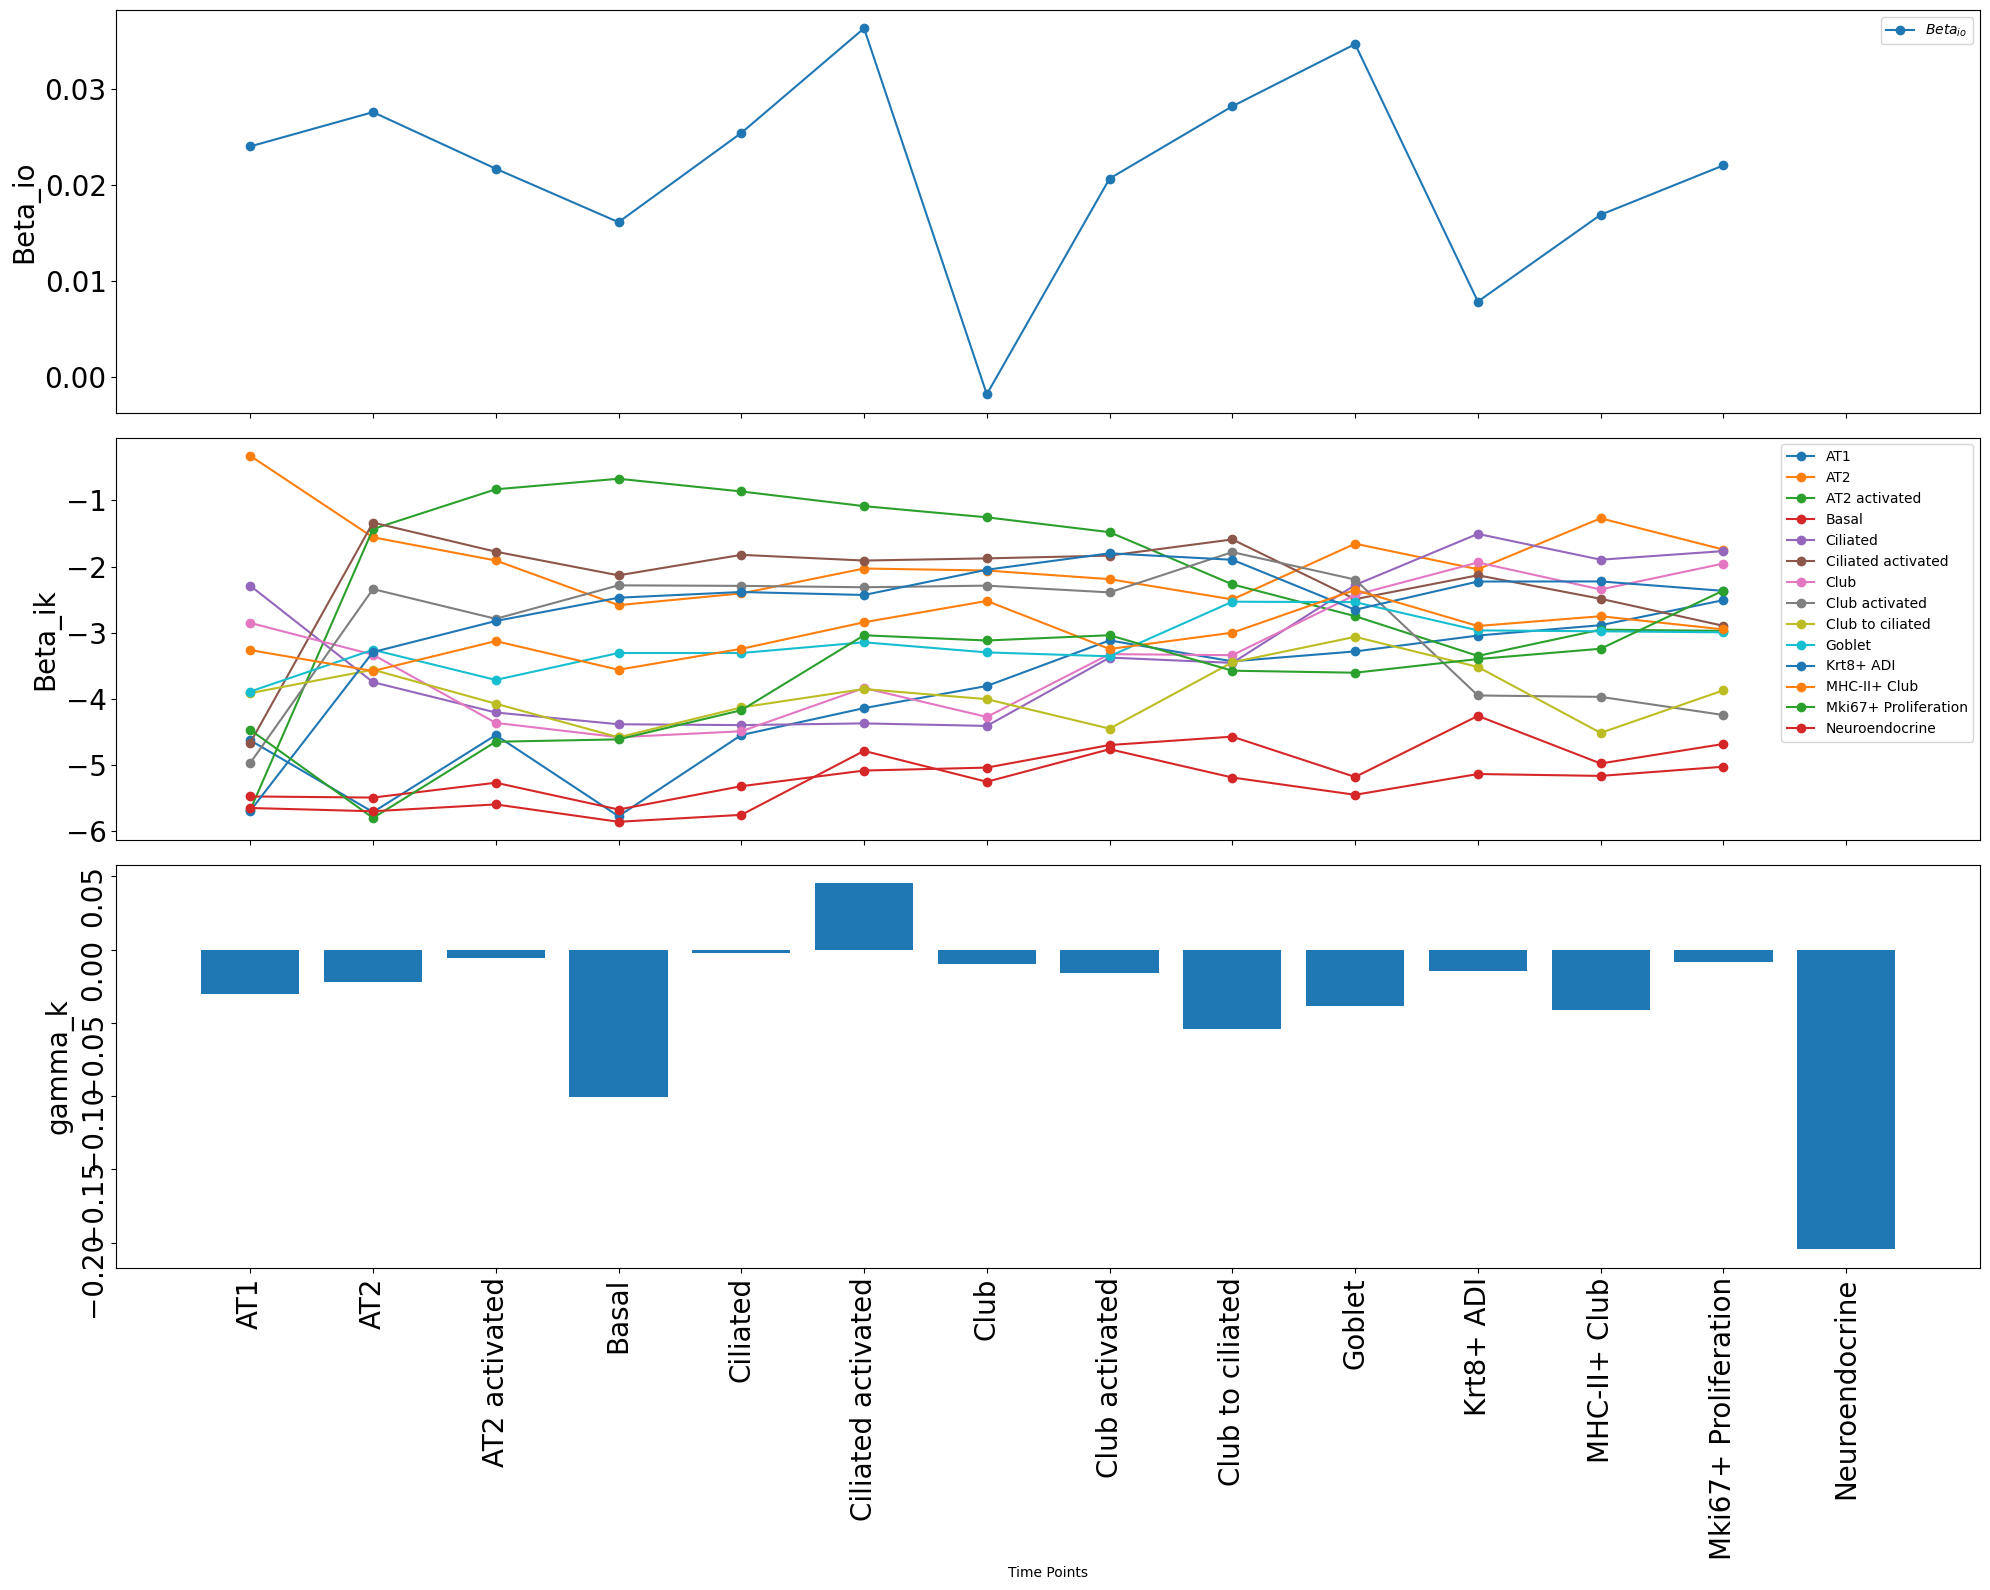

In [13]:
# Print the estimated parameters (optional)
print("Estimated global tissue state (beta_i0):", beta_i0_estimated)
print("Estimated cell type-specific scaling factors (gamma_k):", gamma_k_estimated)
print("Estimated cell type-specific states (beta_ik):", beta_ik_estimated)

# Visualize the simulated data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 16), sharex=True)

# Plot Beta_io (global tissue state)
ax1.plot(beta_i0_estimated, marker='o', label=r'$Beta_{io}$')
ax1.set_ylabel(r'Beta_io', fontsize=20)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=20)

# Plot Beta_ik (cell type-specific state)
for i in range(num_cell_types):
    ax2.plot(beta_ik_estimated[:, i], marker='o', label= list(df_pivot.columns)[i] )
ax2.set_ylabel(r'Beta_ik', fontsize=20)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=20)

# Plot gamma_k (coefficients)
ax3.bar(range(num_cell_types), gamma_k_estimated, tick_label= [ list(df_pivot.columns)[i] for i in range(num_cell_types)] )
ax3.set_ylabel(r'gamma_k', fontsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20, rotation = 90)
#ax3.xticks(rotation=90)

plt.xlabel('Time Points')
plt.tight_layout()
plt.show()

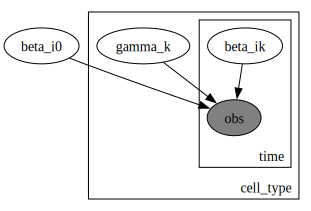

In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

pyro.render_model(model, model_args=(data, n_i), render_params = True)


In [15]:
beta_ik_estimated.shape

torch.Size([13, 14])

# Trend Filtering (D1)

In [16]:
import cvxpy as cp
import numpy as np

log_counts = np.array(beta_ik_estimated)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape

# Define a range of lambda values to test
lambda_values = np.linspace(0.1, 1, 100)  # Adjust as needed

# Placeholder to store the best lambda for each cell type
best_lambdas_d1 = np.zeros(num_cell_types)

# Perform LOOCV for each cell type
for cell_type in range(num_cell_types):
    best_performance = float('inf')
    best_lambda = 0

    for lambda_value in lambda_values:
        errors = np.zeros(num_time_points)

        for i in range(num_time_points):
            # Leave one out
            train_data = np.delete(log_counts[:, cell_type], i)

            # Perform L1 trend filtering (assuming k=1)
            x = cp.Variable(num_time_points - 1)
            D1 = np.eye(num_time_points - 1, k=1) - np.eye(num_time_points - 1)
            D1 = D1[:-1, :]  # First difference matrix

            # Set up the optimization problem
            objective = cp.Minimize(0.5 * cp.sum_squares(train_data - x) +
                                    lambda_value * cp.norm(D1 @ x, 1))
            problem = cp.Problem(objective)
            problem.solve()

            # Predict the left-out point
            predicted = x.value[i-1] if i > 0 else x.value[i]
            errors[i] = (log_counts[i, cell_type] - predicted) ** 2

        # Average error for this lambda
        avg_error = np.mean(errors)

        # Update best performance and lambda
        if avg_error < best_performance:
            best_performance = avg_error
            best_lambda = lambda_value

    best_lambdas_d1[cell_type] = best_lambda
print("Best lambdas for each cell type with first differences:", best_lambdas_d1)

Best lambdas for each cell type with first differences: [0.55454545 0.15454545 1.         0.38181818 0.83636364 1.
 0.13636364 1.         0.33636364 0.15454545 0.14545455 0.42727273
 0.74545455 0.47272727]


[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]


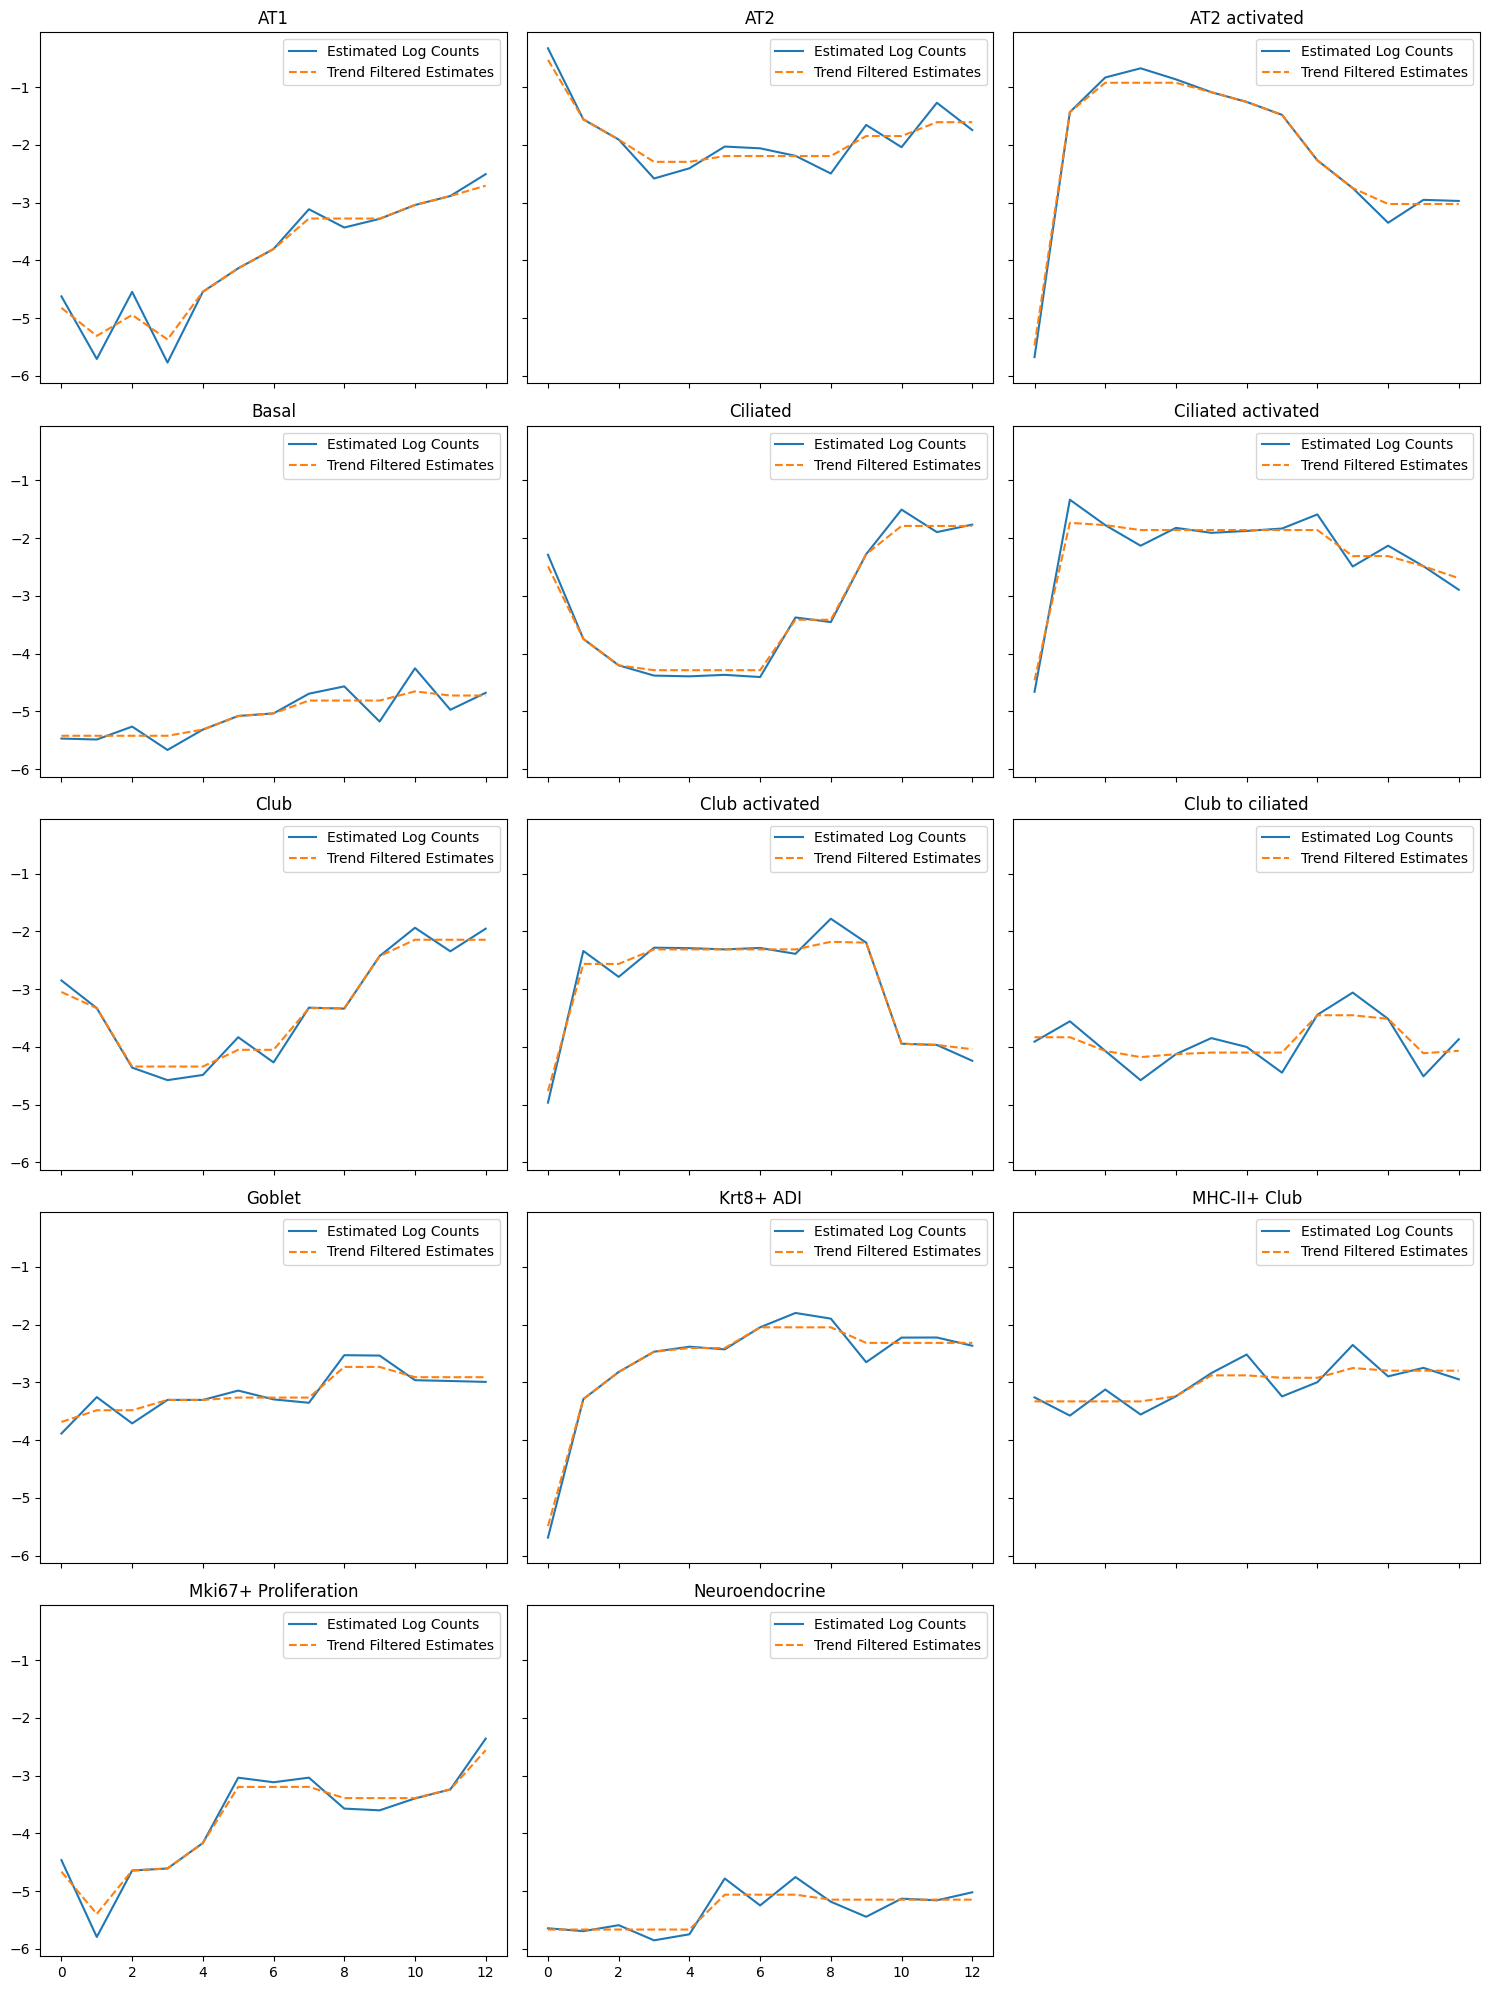

In [21]:
import cvxpy as cp
import numpy as np

# Assuming 'log_counts' is your numpy array of shape (num_time_points, num_cell_types)
log_counts = np.array(beta_ik_estimated)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape

trend_filtered_estimates = np.zeros_like(log_counts)

# Creating the first-difference matrix
D = np.eye(num_time_points, k=1) - np.eye(num_time_points)
D = D[:-1, :]  # Remove the last row to keep only the first differences

print(D)
#for lambda_value in lambda_list:    

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    # Define the variable for the trend-filtered estimate
    x = cp.Variable(num_time_points)
    
    # Set up the optimization problem
    lambda_value = 0.2 # Your chosen lambda value for this cell type
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    
    # Solve the problem
    problem.solve()
    
    # Store the trend-filtered estimates
    trend_filtered_estimates[:, i] = x.value

num_time_points, num_cell_types = log_counts.shape

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]


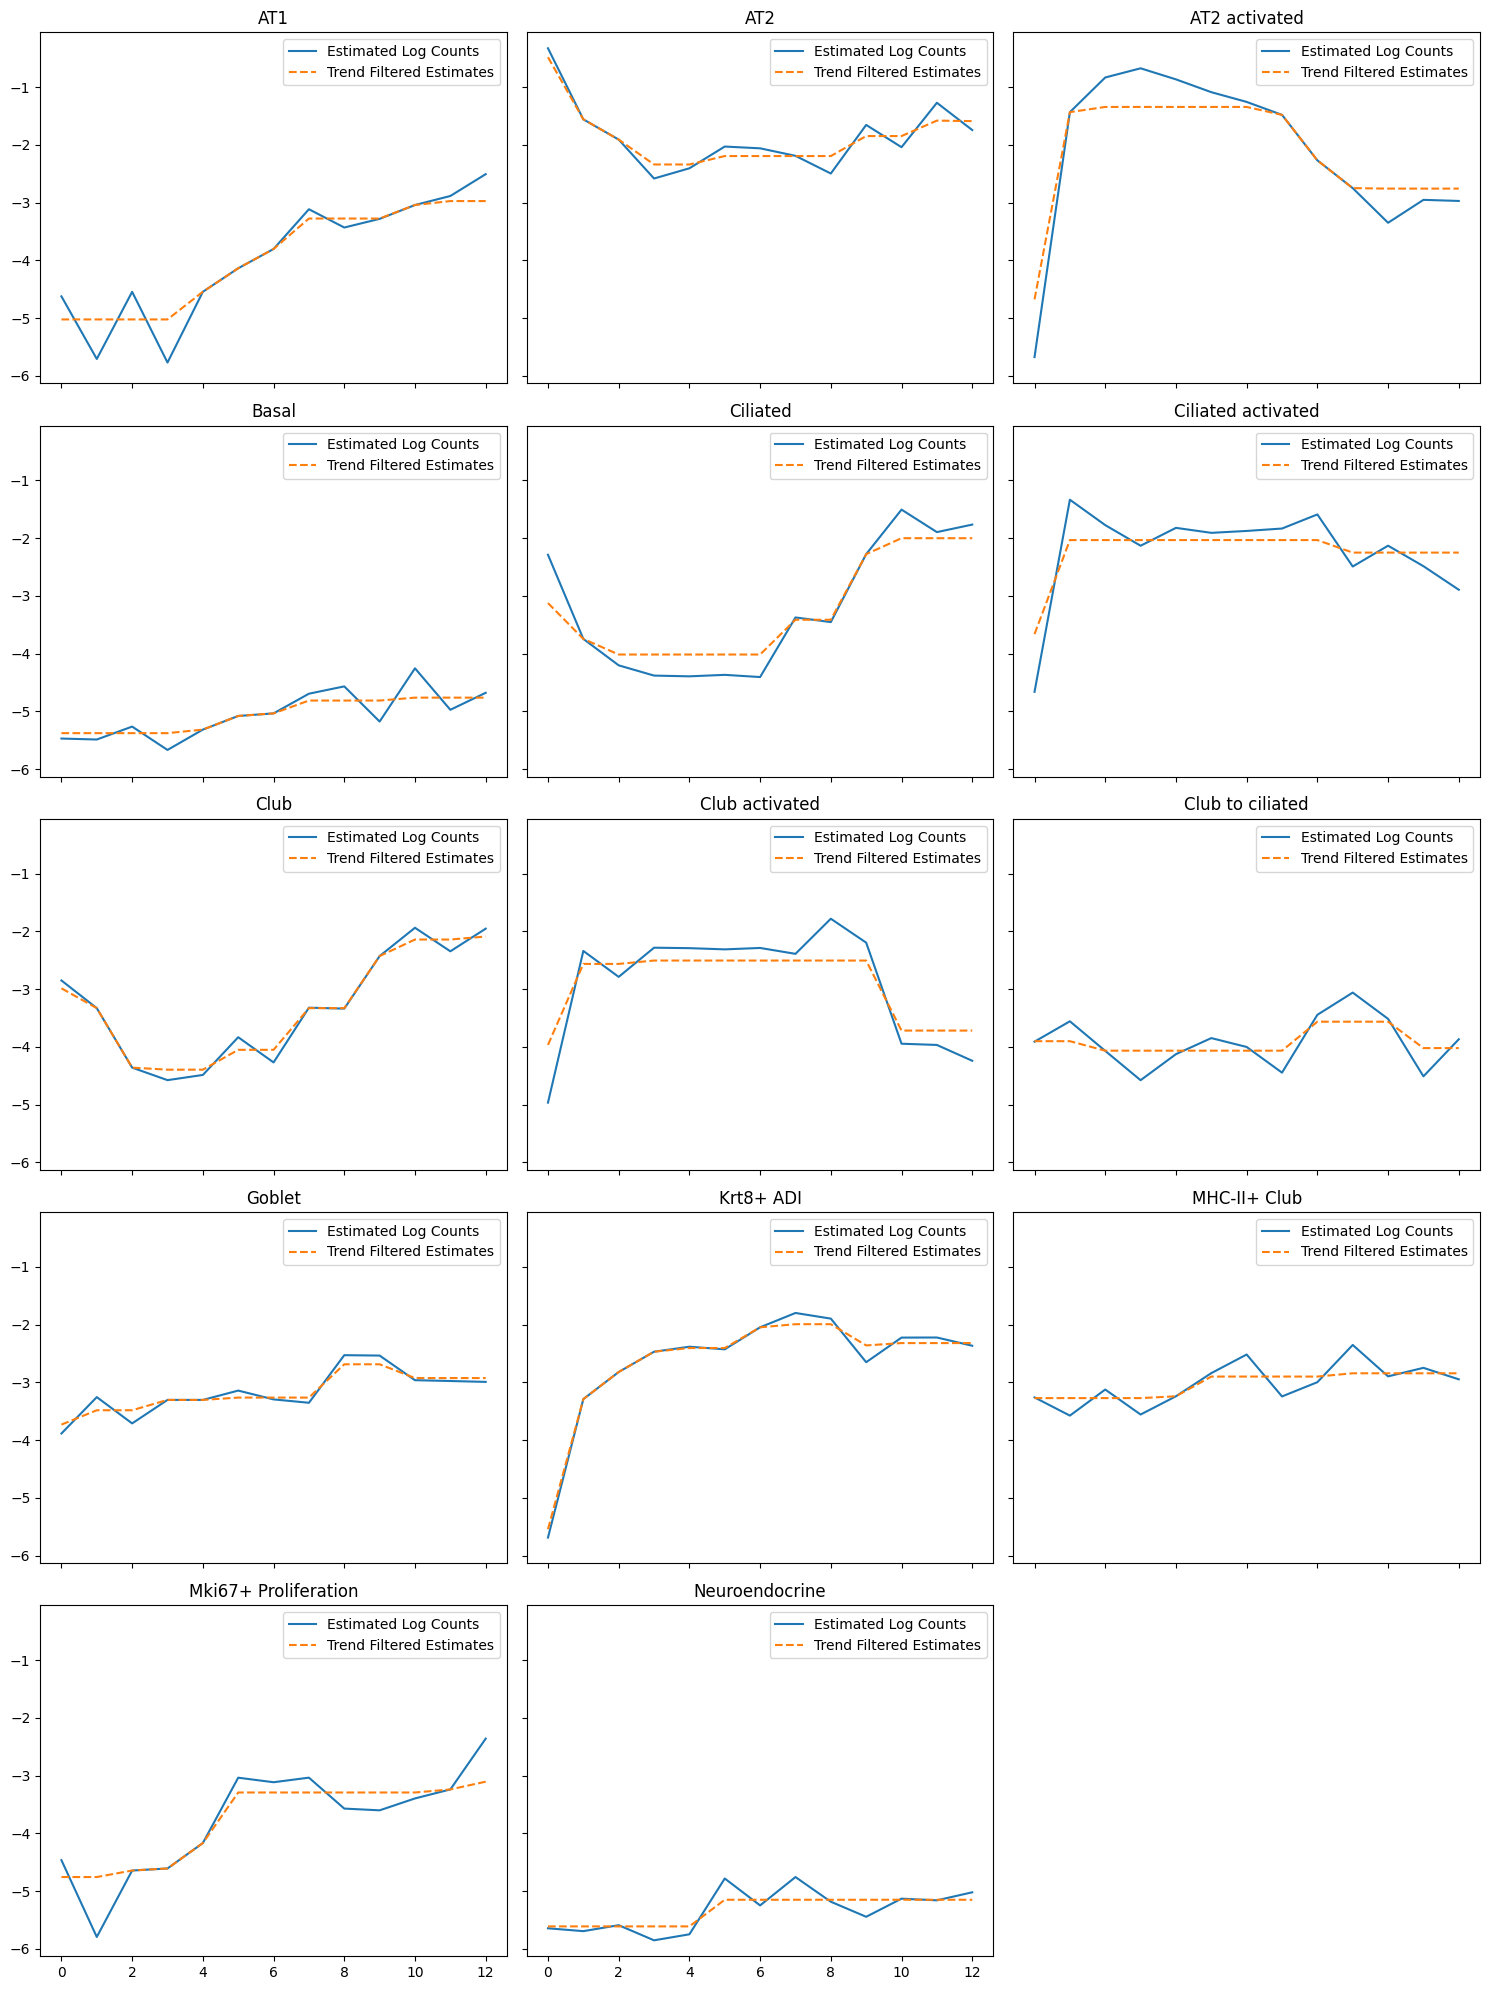

In [17]:
import cvxpy as cp
import numpy as np

# Assuming 'log_counts' is your numpy array of shape (num_time_points, num_cell_types)
log_counts = np.array(beta_ik_estimated)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape

trend_filtered_estimates = np.zeros_like(log_counts)

# Creating the first-difference matrix
D = np.eye(num_time_points, k=1) - np.eye(num_time_points)
D = D[:-1, :]  # Remove the last row to keep only the first differences

print(D)
#for lambda_value in lambda_list:    

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    # Define the variable for the trend-filtered estimate
    x = cp.Variable(num_time_points)
    
    # Set up the optimization problem
    lambda_value = best_lambdas_d1[i]  # Your chosen lambda value for this cell type
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    
    # Solve the problem
    problem.solve()
    
    # Store the trend-filtered estimates
    trend_filtered_estimates[:, i] = x.value

num_time_points, num_cell_types = log_counts.shape

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Trend Filtering (D2)

In [91]:
num_cell_types

14

In [18]:
import cvxpy as cp
import numpy as np

# Assuming 'log_counts' is your numpy array of shape (num_time_points, num_cell_types)
log_counts = np.array(beta_ik_estimated)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape


# Define a range of lambda values to test
lambda_values = np.linspace(0.1, 1, 100)  # Adjust as needed

# Placeholder to store the best lambda for each cell type
best_lambdas_d2 = np.zeros(num_cell_types)



# Perform LOOCV for each cell type
for cell_type in range(num_cell_types):
    best_performance = float('inf')
    best_lambda = 0

    for lambda_value in lambda_values:
        errors = np.zeros(num_time_points)

        for i in range(num_time_points):
            # Leave one out
            train_data = np.delete(log_counts[:, cell_type], i)

            # Perform L1 trend filtering (assuming k=2)
            x = cp.Variable(num_time_points - 1)
            
            # Creating the first-difference matrix
            D2 = np.eye(num_time_points - 1) - 2 * np.eye(num_time_points - 1, k=1) + np.eye(num_time_points - 1, k=2)
            D2 = D2[:-2, :]  # Second difference matrix
            # Set up the optimization problem
            objective = cp.Minimize(0.5 * cp.sum_squares(train_data - x) +
                                    lambda_value * cp.norm(D2 @ x, 1))
            problem = cp.Problem(objective)
            problem.solve()

            # Predict the left-out point
            predicted = x.value[i-1] if i > 0 else x.value[i]
            errors[i] = (log_counts[i, cell_type] - predicted) ** 2

        # Average error for this lambda
        avg_error = np.mean(errors)

        # Update best performance and lambda
        if avg_error < best_performance:
            best_performance = avg_error
            best_lambda = lambda_value

    best_lambdas_d2[cell_type] = best_lambda

print("Best lambdas for each cell type:", best_lambdas_d2)

Best lambdas for each cell type: [1.         0.35454545 1.         1.         0.58181818 1.
 0.18181818 1.         0.29090909 0.30909091 0.92727273 0.42727273
 0.43636364 1.        ]


In [93]:
num_cell_types

14

[[ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]]


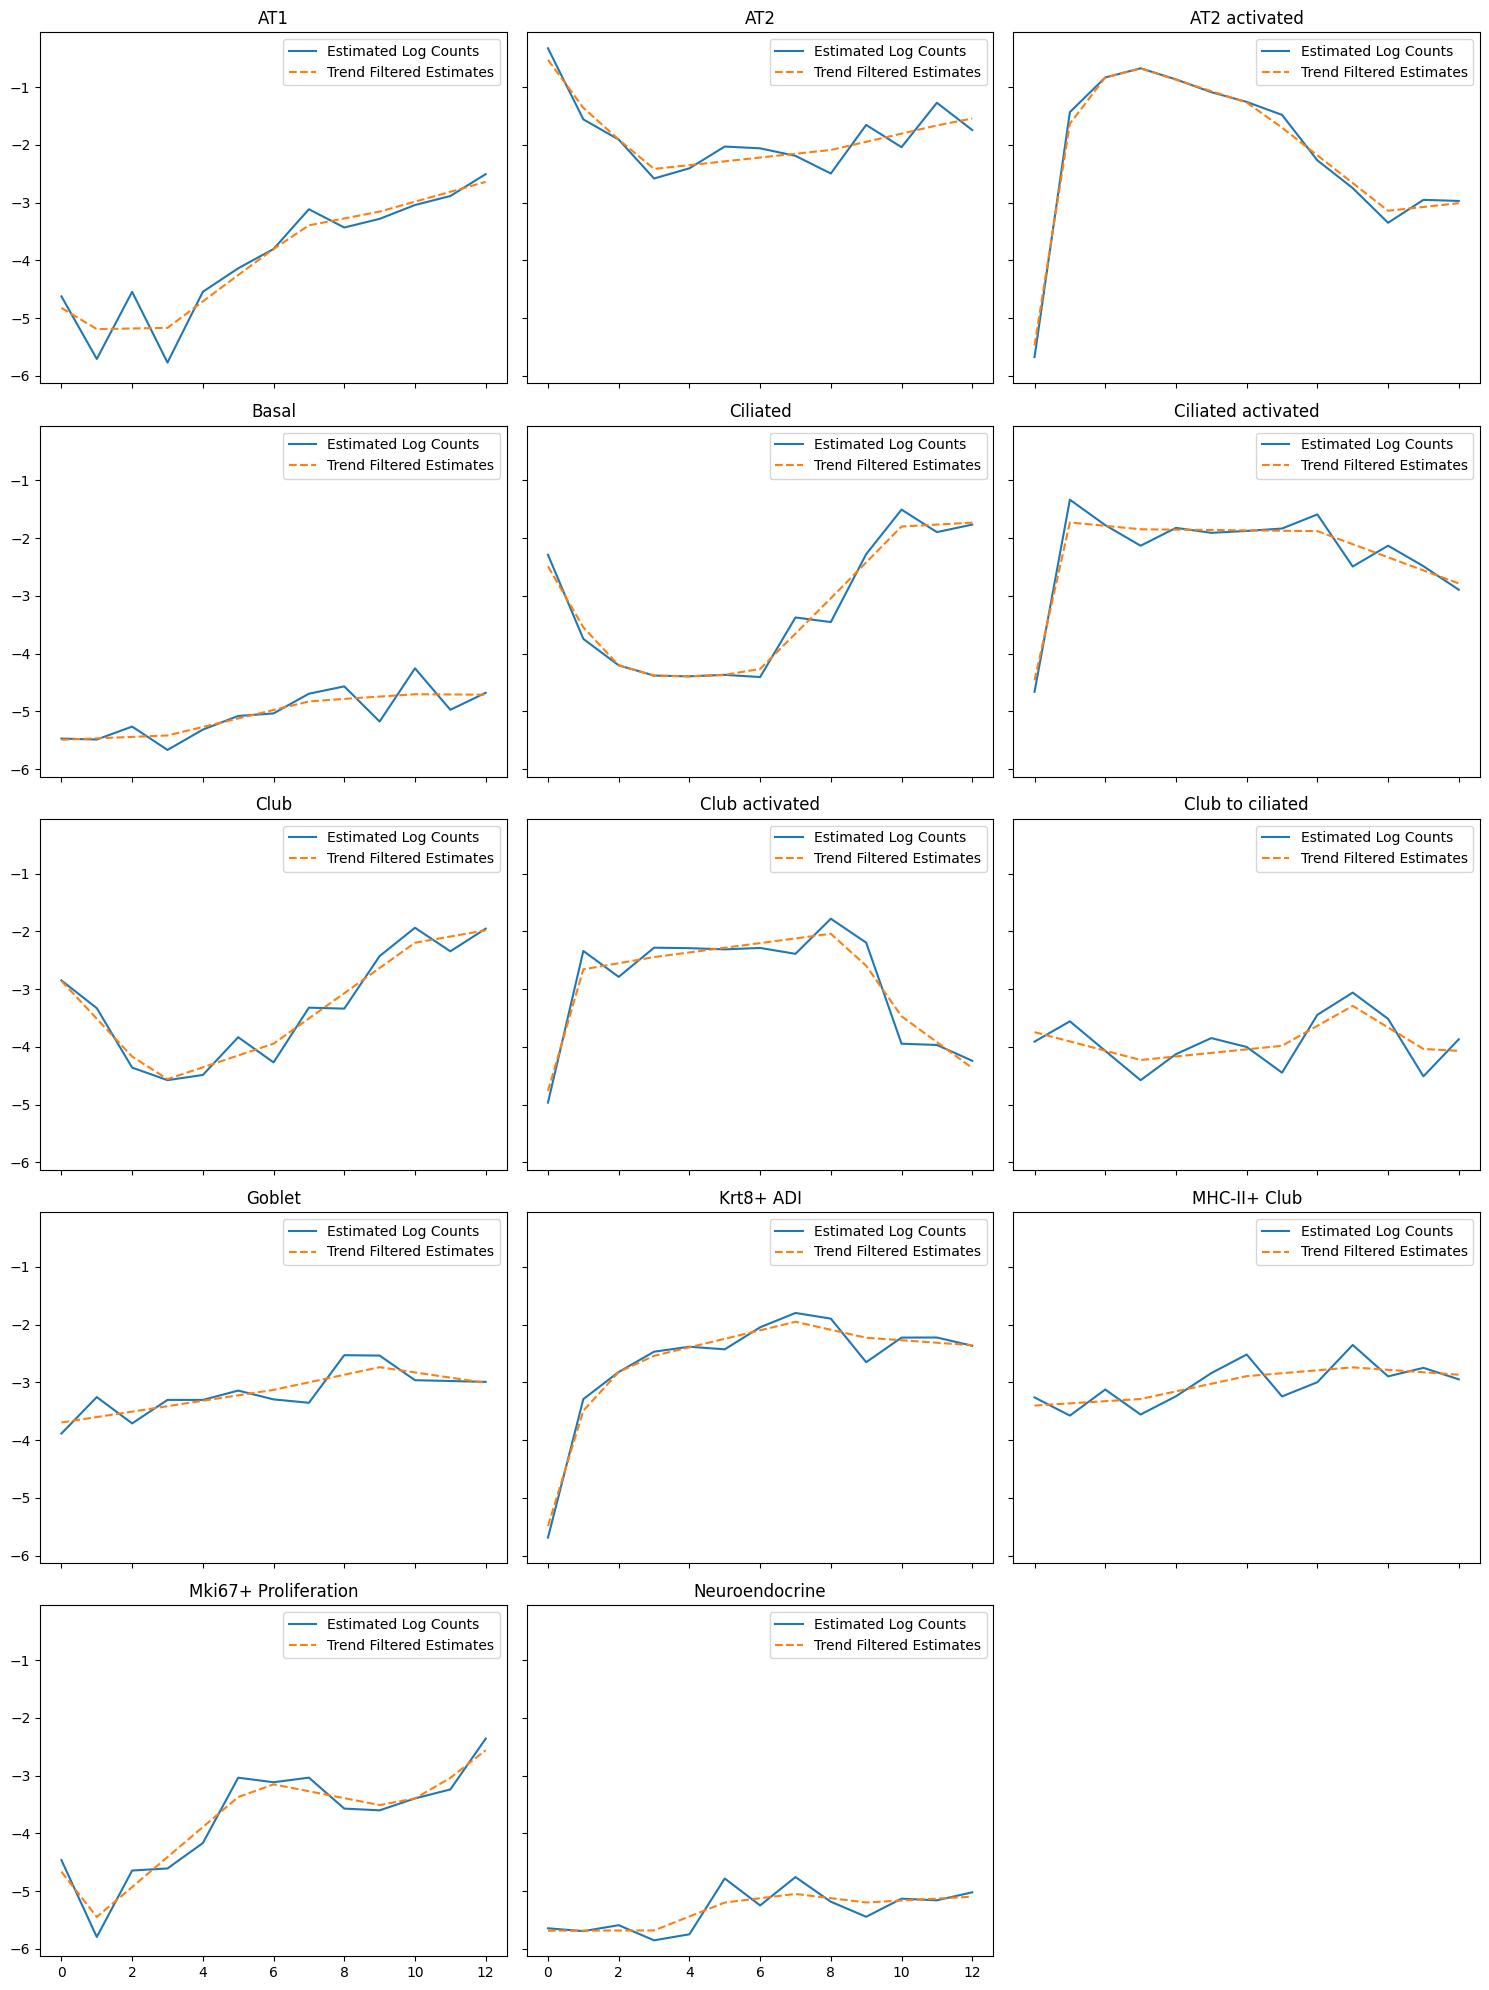

In [19]:
log_counts = np.array(beta_ik_estimated)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape
trend_filtered_estimates = np.zeros_like(log_counts)

D = np.eye(num_time_points) - 2 * np.eye(num_time_points, k=1) + np.eye(num_time_points, k=2)
D = D[:-2, :]  
print(D)

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    x = cp.Variable(num_time_points)
    lambda_value = 0.2  # Adjust lambda value as needed
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    trend_filtered_estimates[:, i] = x.value

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

[[ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]]


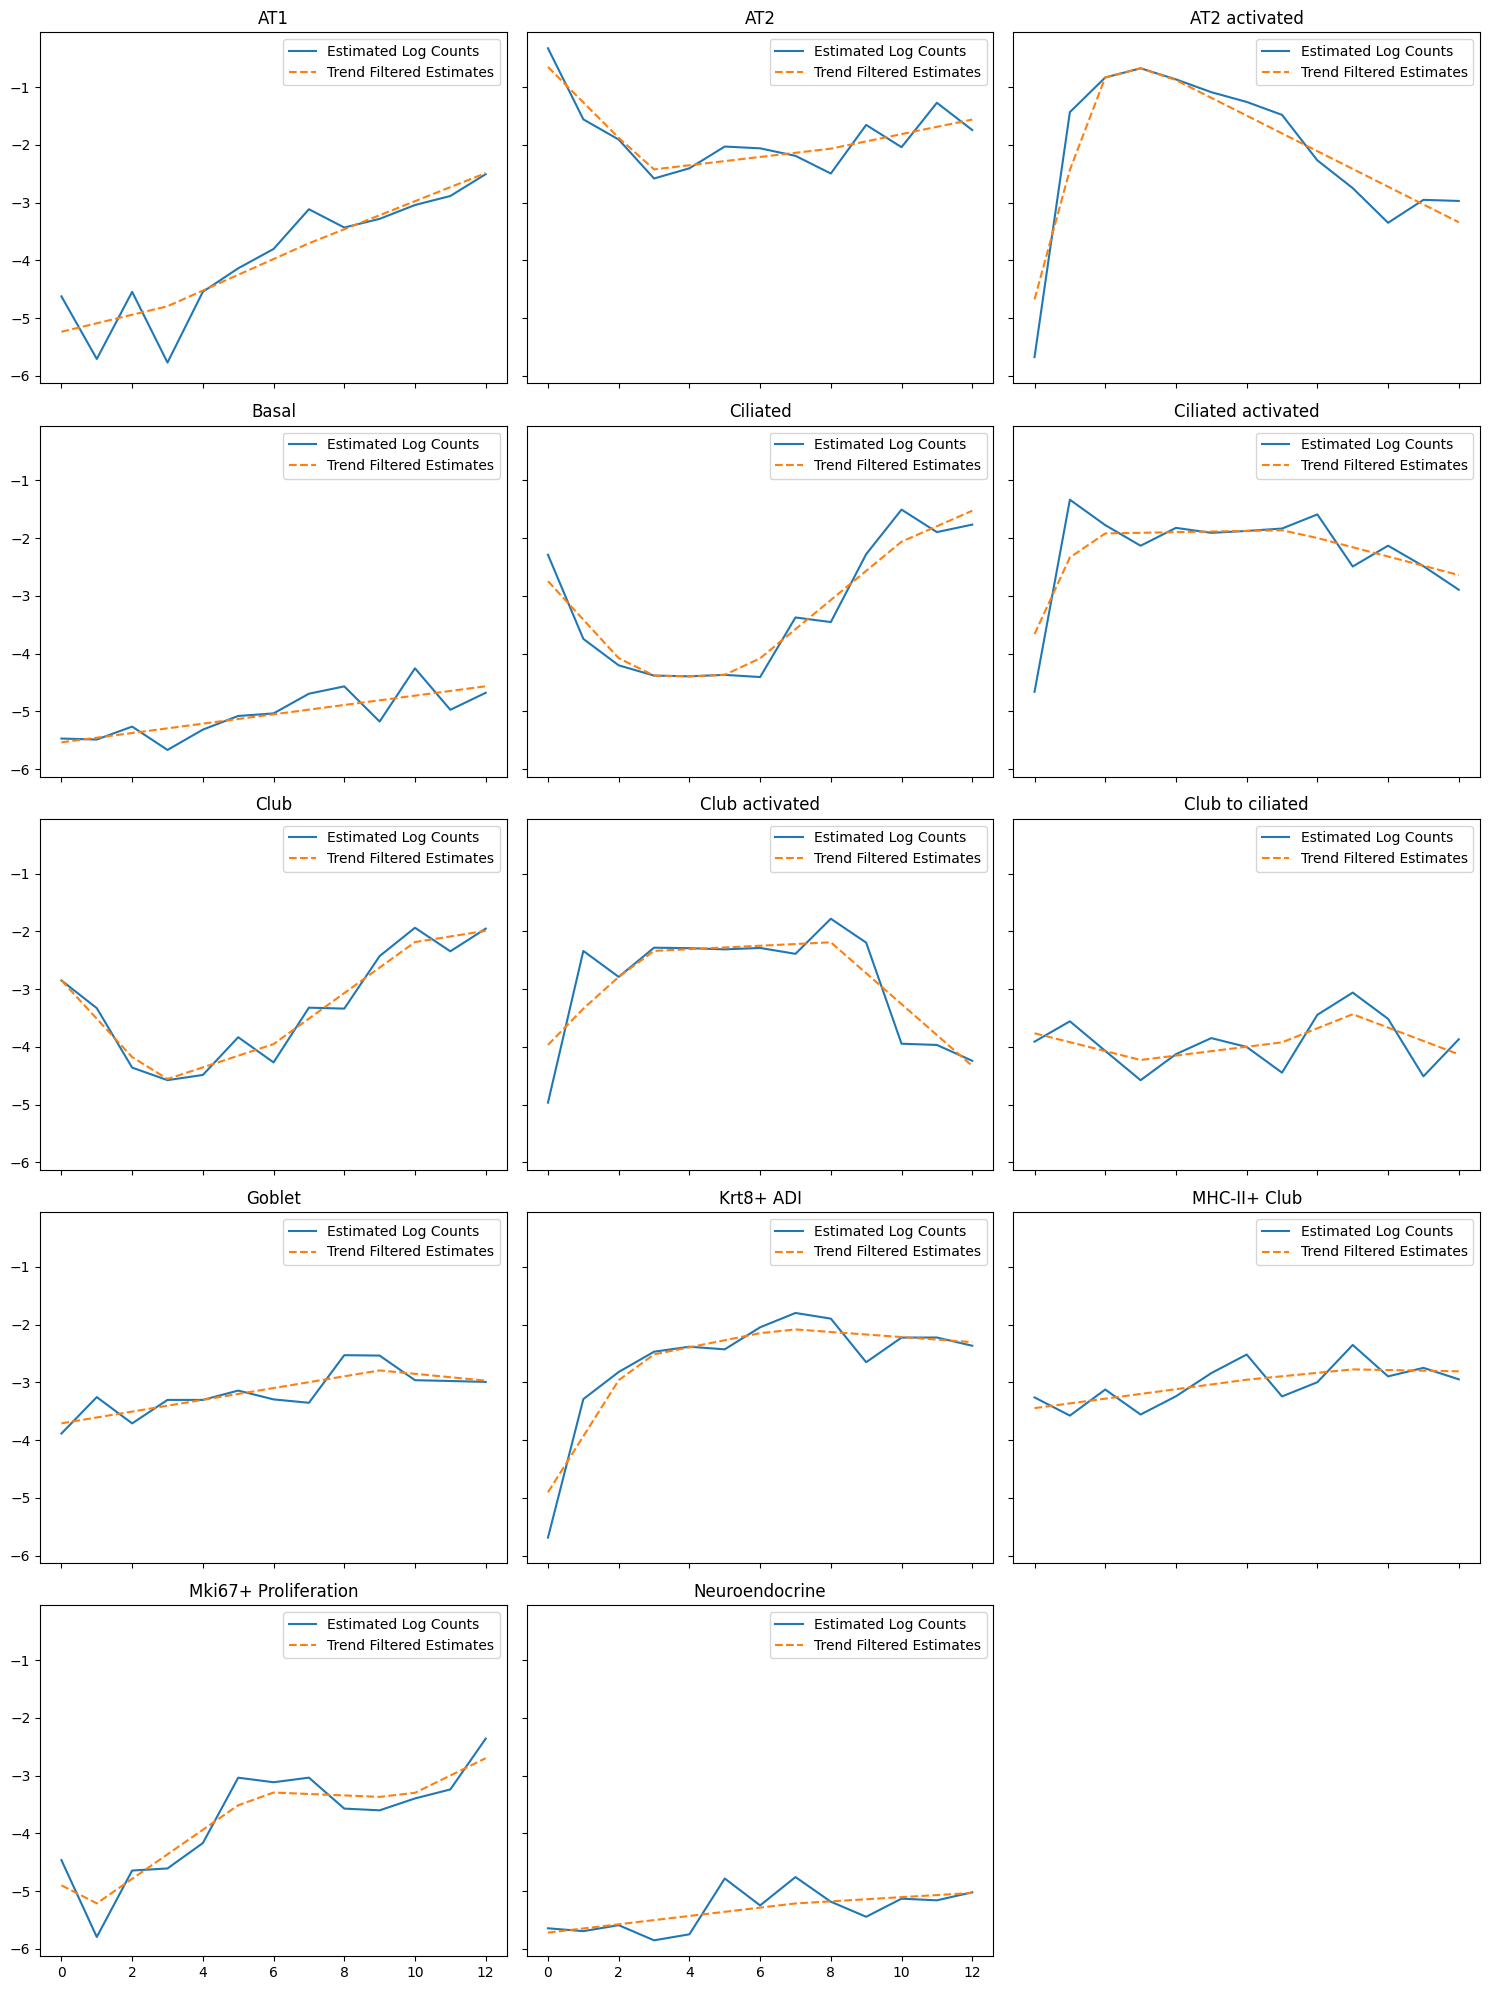

In [22]:
log_counts = np.array(beta_ik_estimated)  # Your log counts data here

num_time_points, num_cell_types = log_counts.shape
trend_filtered_estimates = np.zeros_like(log_counts)

D = np.eye(num_time_points) - 2 * np.eye(num_time_points, k=1) + np.eye(num_time_points, k=2)
D = D[:-2, :]  
print(D)

# For each cell type, set up and solve the trend filtering problem
for i in range(num_cell_types):
    x = cp.Variable(num_time_points)
    lambda_value = best_lambdas_d2[i]  # Adjust lambda value as needed
    objective = cp.Minimize(0.5 * cp.sum_squares(log_counts[:, i] - x) +
                            lambda_value * cp.norm(D @ x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    trend_filtered_estimates[:, i] = x.value

# Set up the matplotlib figure and axes for a 5x3 subplot arrangement
fig, axes = plt.subplots(5, 3, figsize=(15, 20), sharex=True, sharey=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the data
for i in range(num_cell_types):
    ax = axes[i]
    ax.plot(log_counts[:, i], label='Estimated Log Counts')
    ax.plot(trend_filtered_estimates[:, i], label='Trend Filtered Estimates', linestyle='--')
    ax.set_title( list(df_pivot.columns)[i])
    ax.legend()


# Remove the last two subplots (5x3 grid will have one empty space)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

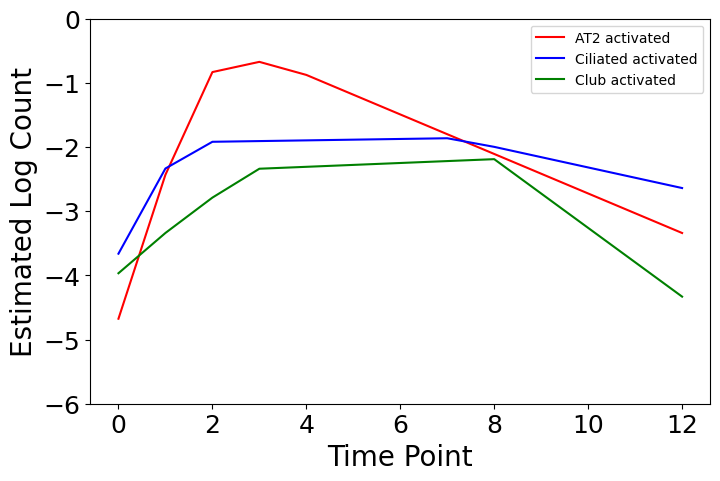

In [23]:
# Line plots for each cell type
plt.figure(figsize=(8, 5))

colores = ['red', 'blue', 'green', 'brown']
i = 0
for cell_type in [2, 5, 7]:
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color = colores[i])
    i = i + 1

#plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point', size = 20)
plt.ylabel('Estimated Log Count',size = 20)
plt.ylim(-6, 0)  # Set the y-axis range from -5 to 0
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()

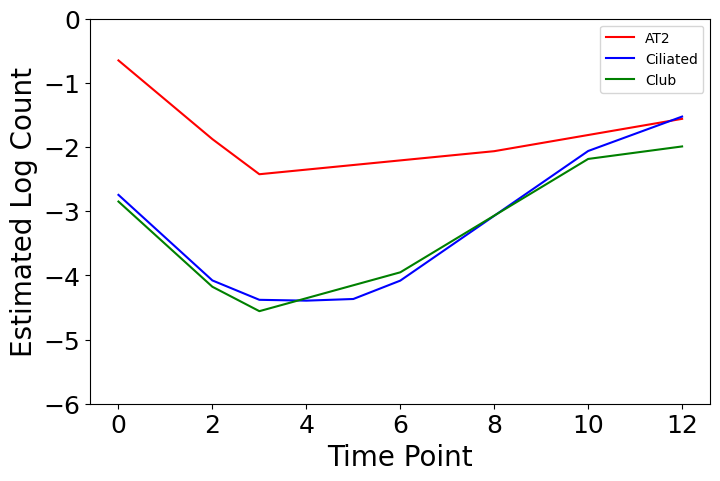

In [24]:
# Line plots for each cell type
plt.figure(figsize=(8, 5))

colores = ['red', 'blue', 'green', 'brown']
i = 0
for cell_type in [1, 4, 6]:
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color = colores[i])
    i = i + 1

#plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point', size = 20)
plt.ylabel('Estimated Log Count',size = 20)
plt.ylim(-6, 0)  # Set the y-axis range from -5 to 0
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()

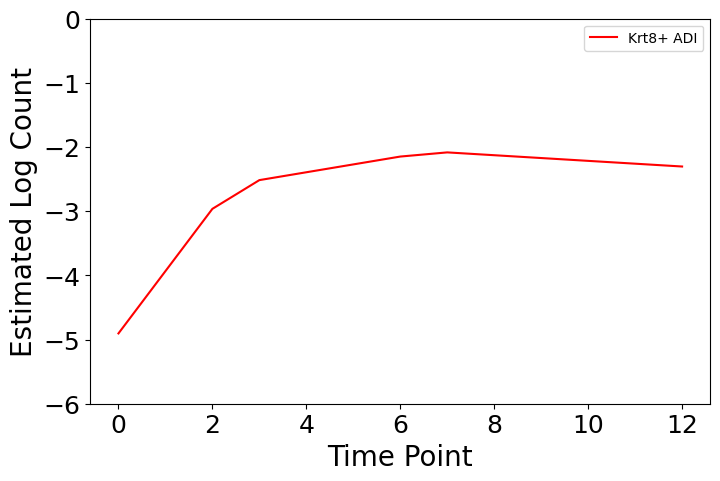

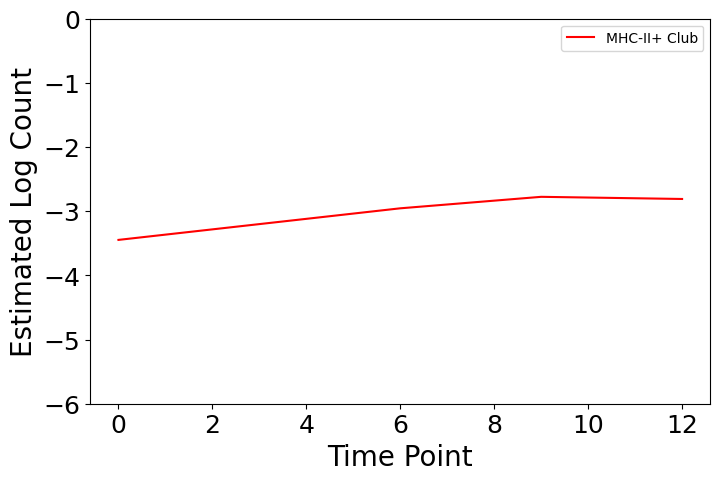

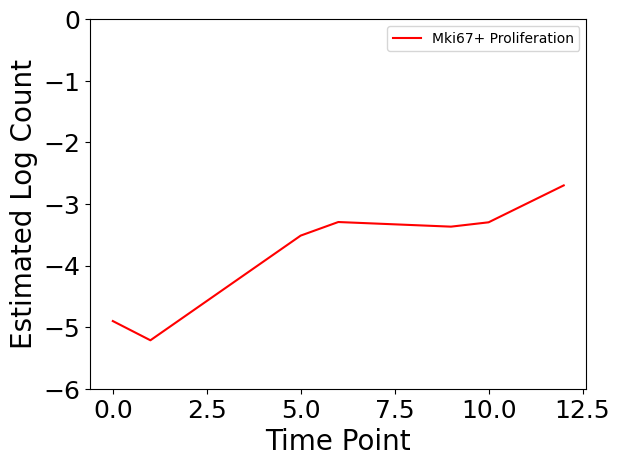

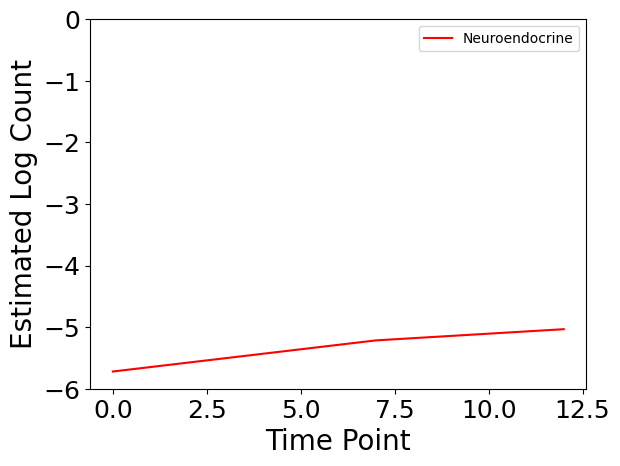

In [27]:
# Line plots for each cell type
plt.figure(figsize=(8, 5))

colores = ['red', 'blue', 'green', 'brown']
i = 0
for cell_type in [10]:
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color = colores[i])
    i = i + 1

#plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point', size = 20)
plt.ylabel('Estimated Log Count',size = 20)
plt.ylim(-6, 0)  # Set the y-axis range from -5 to 0

plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()

# Line plots for each cell type
plt.figure(figsize=(8, 5))

colores = ['red', 'blue', 'green', 'brown']
i = 0
for cell_type in [11]:
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color = colores[i])
    i = i + 1

#plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point', size = 20)
plt.ylabel('Estimated Log Count',size = 20)
plt.ylim(-6, 0)  # Set the y-axis range from -5 to 0

plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()
colores = ['red', 'blue', 'green', 'brown']
i = 0
for cell_type in [12]:
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color = colores[i])
    i = i + 1

#plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point', size = 20)
plt.ylabel('Estimated Log Count',size = 20)
plt.ylim(-6, 0)  # Set the y-axis range from -5 to 0

plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()


colores = ['red', 'blue', 'green', 'brown']
i = 0
for cell_type in [13]:
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color = colores[i])
    i = i + 1

#plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point', size = 20)
plt.ylabel('Estimated Log Count',size = 20)
plt.ylim(-6, 0)  # Set the y-axis range from -5 to 0

plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.show()


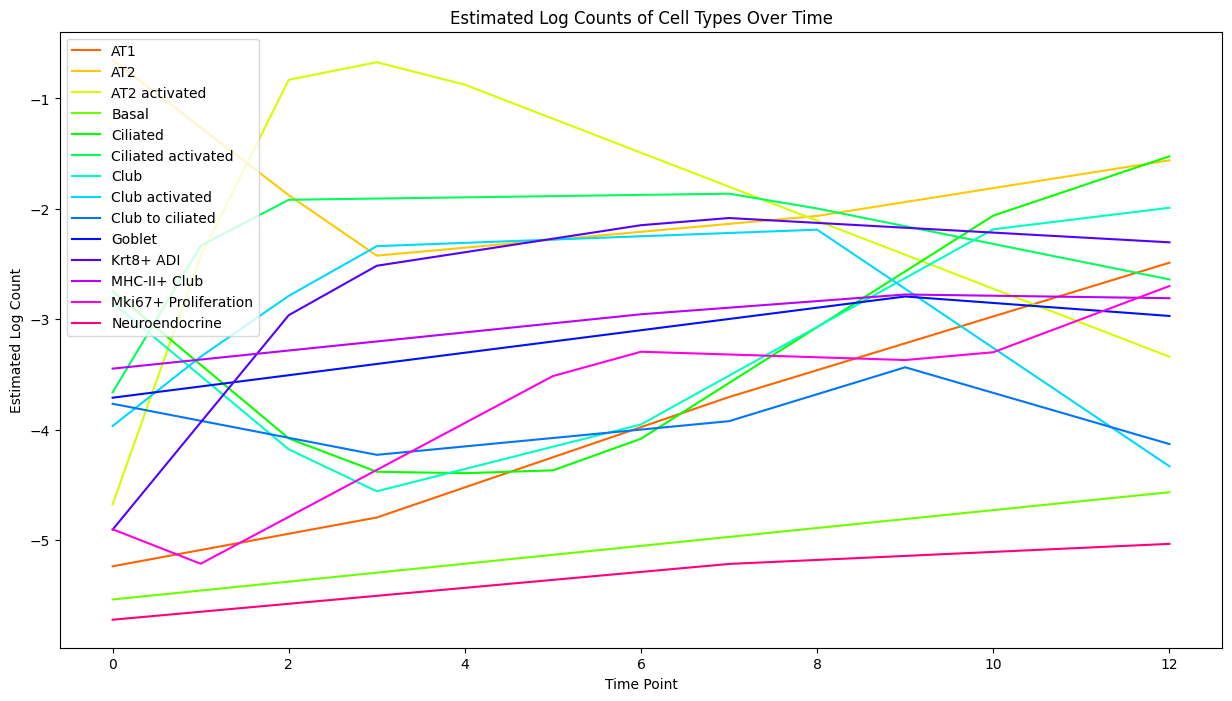

In [30]:
# Line plots for each cell type
plt.figure(figsize=(15, 8))
import seaborn as sns

n_lines = trend_filtered_estimates.shape[1]
palette = sns.color_palette("hsv", n_lines) 

for cell_type, color in zip(range(n_lines), palette):
    plt.plot(trend_filtered_estimates[:, cell_type], label=list(df_pivot.columns)[cell_type], color=color)

plt.title('Estimated Log Counts of Cell Types Over Time')
plt.xlabel('Time Point')
plt.ylabel('Estimated Log Count')
plt.legend()
plt.show()

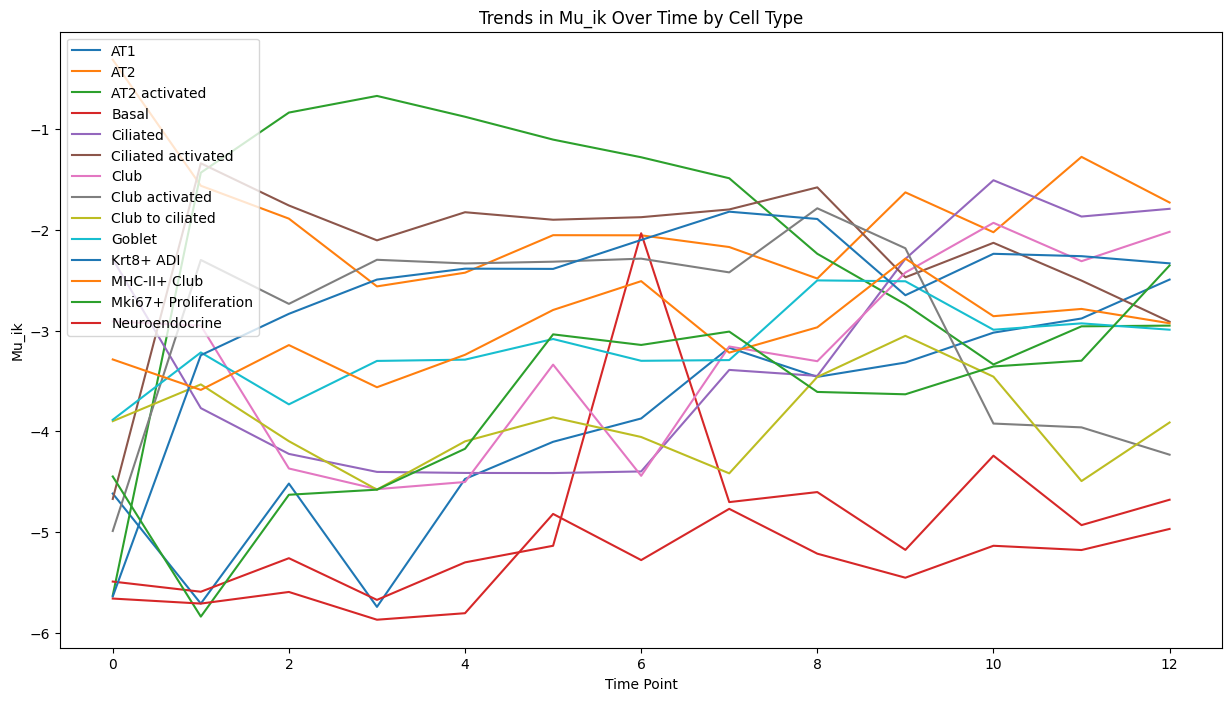

In [95]:
# Assuming gamma_k_estimated, beta_i0_estimated, and beta_ik_estimated are your estimated parameters
mu_ik_estimated = gamma_k_estimated.unsqueeze(0) * beta_i0_estimated.unsqueeze(-1) + beta_ik_estimated

# Convert to numpy for plotting, if they are tensors
mu_ik_numpy = mu_ik_estimated.numpy()

# Plotting mu_ik for each cell type over time
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharex=True)

for k in range(mu_ik_numpy.shape[1]):
    plt.plot(mu_ik_numpy[:, k], label=list(df_pivot.columns)[k])

plt.xlabel('Time Point')
plt.ylabel('Mu_ik')
plt.title('Trends in Mu_ik Over Time by Cell Type')
plt.legend()
plt.show()

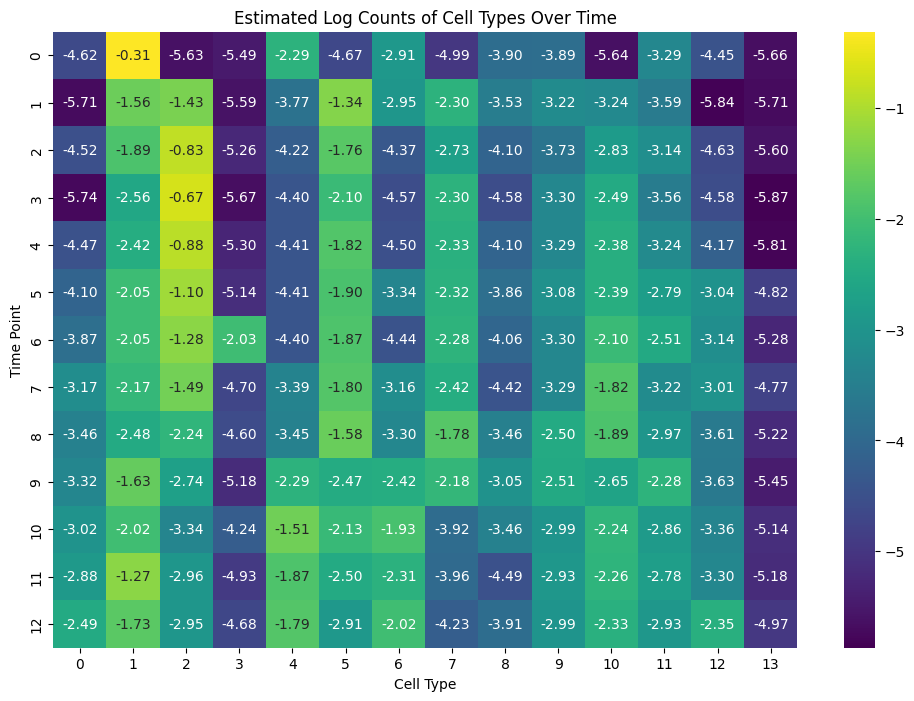

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming mu_ik_estimated is a PyTorch tensor, convert it to a NumPy array for plotting
mu_ik_estimated_np = mu_ik_estimated.numpy()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mu_ik_estimated_np, annot=True, cmap='viridis', fmt=".2f")
plt.title("Estimated Log Counts of Cell Types Over Time")
plt.xlabel("Cell Type")
plt.ylabel("Time Point")
plt.show()